# Narrative Flow of Men and Women



 ### Hypothesis:

Solidarity and social relations were different in the men and women sections of Birkenau; men and women recall them in different ways and in different context; solidarity and social bonds have different place in the narratives of men and women.

If the hypothesis is true:
- the story line (or narrative flow) leading to the discussion of sociability and solidarity is different in testimonies of men and women; the most likely sequences of topics (to be named narrative pathway) leading to topics describing solidarity and sociability are different
- different amount of traffic is going through  similar pathways leading to solidarity and sociability
- either different nodes (to be named priming topics) are preceding and following (to be named exit topics) topics of solidarity and sociability or if they are similar transitions to them happen at different intensitiy


Key research questions to be studied here:
- What are the major pathways between the memory of arrival to Birkenau and leaving from Birkenau?
- How are nodes related to solidarity (food sharing, aid giving) and social bonds (friends, social bonds, family) are situated along the major pathways? For women and men, are they peripheral or central? I.e. do a significant amount of narrative flow go towards them for men and women?
- What are the exit and priming topics for solidarity (food sharing, aid giving) and social bonds for men and women? What are those topics that prime them?
- How are topics of solidarity and social bonds related to survival explanations?
- How is friendship related to aid giving for men and for women? What are the transitory topics between them?
- Where did solidarity take place? In what contexts did solidarity take place?



## Summary of observations

In the dataset we can observe two general trends about the way women and men discuss acts of solidarity and social bonds.

Trend 1:

Both men and women discuss aid giving in the context of camp living conditions and forced labour. 

However, aid giving is more likely to follow living conditions for women than for men;(aid giving is more likely to follow forced labor for men than for women. This is supported by Observation 1).

The same can be observed with food sharing. Women rather discuss food sharing following living conditions, and men tend to discuss it following forced labour. (Supported by Observation 3).

Similarly, women tend to discuss friendship following living conditions more than men do. (Supported by Observation 5). Men tend to discuss friendship following forced labor more than women do. (Supported by Observation 5).

We can observe a similar pattern with social relations; women discuss it following living conditions whereas men following forced labor. (Supported by Observation 5 A).

Women are also more likely to connect preferential treatment with living conditions than men (Supported by Observation 24 A)

The trend that women are more likely to connect the living environment with social activity and solidarity than men is becoming much more stronger when we compare those men and women who did not work (supported by Observation 14, 14 A. and 14 B).

At the same time, social relations and friends remain more connected with forced labour for men who worked(supported by Observation 18). By contrast, in the narrative of women, friends and living conditions are more connected (supported by Observation 18A)

Men who worked are more likely to discuss food sharing in the context of forced labor than women; men who worked are more likely to discuss aid giving in the context of forced labor than women;(supported by Observation 21).

As a whole, women are more likely to discuss social activity and acts of solidarity in the context of living environment, whereas men in the context of forced labour. All this suggests that in women's barracks more social life and acts of solidarity took place thank in men barracks; by contrast men were more likely to experience solidarity and social bonds during forced labour and less in the living environment.

The fact that the social dynamics was different in the living environment of women and men is also supported by the following observation. Women are much more likely to connect the living environment with preferential treatment (Observation 24 A).

Trend 2.

Both women and men discuss solidarity and social bonds in the context of survival explanations.

However, women are more likely to connect social relations and aid giving (involving social relations, selection, friends in-between steps)  with survivor explanations. (Supported by Observation 8).

Social relations include also the Blockalteste; women are more likely to connect Blockalteste with survival explanations (supported by Observation 24).

Women who did not work are more likely to connect friendship and social relations with survival explanations (supported by Observation 13). 

Women are particularly more likely to attribute their survival of selections to social relations, friends and aid giving (supported by Observation 9).

In summary, social relations and acts of solidarity have larger weight in narrative paths leading to survival explanations for women. This signals  that women are more likely to attribute their survival to solidarity and social bonds. Again, this suggest that solitary and social bonds were more prevalent in the women sections.

## Load the necessary libraries and set up paths

In [1]:
import constants
import pandas as pd
import os
from IPython.display import display
import json
import pyemma
from tables import *
import sys; sys.path.insert(0, '..')
from markov_modelling.markov_utils import *
from collections import Counter
#from varname.helpers import Wrapper

Matplotlib created a temporary config/cache directory at /var/folders/xs/sj3jhyss5c54vc9k08_ghz39q764f6/T/matplotlib-045s_t6u because the default path (/Users/gmt28/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
input_directory = constants.output_data_markov_modelling
path = os.getcwd()
parent = os.path.abspath(os.path.join(path, os.pardir))
input_directory = parent +'/'+ constants.output_data_markov_modelling

## Load the relevant data

Load the complete women and men data 

In [3]:
data_set_1_w  = pyemma.load(input_directory+'complete_w'+'/'+'pyemma_model','simple')
data_set_1_complete  = pyemma.load(input_directory+'complete'+'/'+'pyemma_model','simple')
data_set_1_m = pyemma.load(input_directory+'complete_m'+'/'+'pyemma_model','simple')
data_set_1_complete = pyemma.load(input_directory+'complete'+'/'+'pyemma_model','simple')

Load the stationary probabilities

In [4]:
stationary_probs = pd.read_csv(input_directory+'/'+'complete'+'/'+'stationary_probs.csv')

Load data representing men and women who worked

In [5]:
data_set_1_w_work  = pyemma.load(input_directory+'work_w'+'/'+'pyemma_model','simple')
data_set_1_m_work = pyemma.load(input_directory+'work_m'+'/'+'pyemma_model','simple')

Load data representing men and women who did not  work

In [6]:
data_set_1_w_not_w  = pyemma.load(input_directory+'notwork_w'+'/'+'pyemma_model','simple')
data_set_1_m_not_w = pyemma.load(input_directory+'notwork_m'+'/'+'pyemma_model','simple')

Load the state index

In [7]:
features_df = pd.read_csv(parent+'/'+constants.segment_keyword_matrix_feature_index)

## Create functions for frequently used operations

### Calculate first mean passage time function

In [8]:
def calculate_mfpt(mm,source,target,topic_labels):
    source_indices = []
    for element in source:
        source_index_full = topic_labels.index(element)
        source_index_active = mm._full2active[source_index_full]
        source_indices.append(source_index_active)
    target_indices = []
    for element in target:
        target_index_full = topic_labels.index(element)
        target_index_active = mm._full2active[target_index_full]
        target_indices.append(target_index_active)
    print (source_indices)
    mfpt = pyemma.msm.tpt(mm,source_indices,target_indices).mfpt
    print (mfpt)

### Print paths functions

In [9]:
def print_paths(flux_w,max_length=None):
    for path in flux_w:
        if max_length is not None:
            if len(path.split('-'))<=max_length:
                print (path + ':' + str(flux_w[path]))
                print ('\n')
        else:
            print (path + ':' + str(flux_w[path]))
            print ('\n')

In [10]:
def print_similar_paths(flux_w,flux_m,max_length=None,show=True):
    all_paths = []
    for path in flux_w:
        if max_length is not None:
            if len(path.split('-'))<=max_length:
                all_paths.append(path)
        else:
            all_paths.append(path)
    for path in flux_m:
        if max_length is not None:
            if len(path.split('-'))<=max_length:
                all_paths.append(path)
        else:
            all_paths.append(path)
    counts = Counter(all_paths)

    dup_paths = [path for path in all_paths  if counts[path] > 1]
    dup_paths = set(dup_paths)
    if show:
        for path in dup_paths:
            print (path)
            print ('Women: '+str(flux_w[path]))
            print ('Men: '+str(flux_m[path]))
            print ('\n')
    else:
        result = []
        for path in dup_paths:
            
            result.append([path,flux_w[path],flux_m[path]])
        return result


In [11]:
from tqdm.notebook import trange, tqdm
def identify_paths_with_substantial_difference(states,model_1,model_2,ratio=1.5):
    
    flux = 0.6
    
    for i in trange(len(states)):
        story_start = states[i]
        for target in states:
            try:
                if target == story_start:
                    continue
                else:
                    story_end = target
                    flux_1 = calculate_flux(model_1,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

                    flux_2 = calculate_flux(model_2,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
                    result=print_similar_paths(flux_1,flux_2,max_length=3,show=False)
                    for element in result:
                        if ((element[1]/element[2])>ratio) or ((element[2]/element[1])>ratio):
                            print (element[0])
                            print (element[1])
                            print (element[2])
            except:
                pass

In [12]:
def get_inoutgoing_probabilities(msm, central_topics, context_topics, n_lag=1, reduce_to_active=False):
    """
    Compute cumulative probabilities from a context of topics into and out of a central topic.
    
    :param msm: pyemma.msm.MarkovStateModel
    :param central_topics: list of topics at the "center", to evaluate incoming and outgoing probablity from/to
    :param context_topics: list of topics to consider as start/end states into which/from which probability to
    central_topics is computed
    :param n_lag: int for transition matrix power (time step of output)
    :param reduce_to_active: bool; if True, reduces context_topics to the subset that is in the active set.
    """

    # get indices
    idx_context = features_df[features_df.KeywordLabel.isin(context_topics)].index
    idx_central = features_df[features_df.KeywordLabel.isin(central_topics)].index
    
    # check that central topic is in active set:
    assert np.all(np.in1d(idx_central, msm.active_set))
    
    # either check if the same is true for context topics or reduce them to the sub-set that is in active set
    if not reduce_to_active:
        assert np.all(np.in1d(idx_context, msm.active_set)), 'not in active set' + str(np.array(context_topics)[~np.in1d(idx_context, msm.active_set)])
    else:
        idx_context = idx_context[np.in1d(idx_context, msm.active_set)]
        
    # map indices to msm active set
    idx_context = msm._full2active[idx_context]
    idx_central = msm._full2active[idx_central]

    # matrix-power the transition matrix to estimate transition probabilities for higher lag times
    t = np.linalg.matrix_power(msm.transition_matrix, n_lag)
    
    # probability of following state is computed from transition matrix row
    out_prob = t[np.ix_(idx_central, idx_context)].sum()
    
    # probability of last state is computed from row-normalized transposed transition matrix
    t_t = t.T / t.T.sum(axis=1, keepdims=True)
    assert msmtools.analysis.is_transition_matrix(t_t)
    
    in_prob = t_t[np.ix_(idx_central, idx_context)].sum()
    return in_prob, out_prob

def plot_inoutgoing_probabilities(probs_w, probs_m, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    lbls = ['preceding','following']
    linestyles = ['-', ':']
    numerator = 0
    for _pw, _pm, lbl, linestyle in zip(probs_w.T, probs_m.T, lbls, linestyles):
        print (numerator)
        if numerator == 0:
            numerator = numerator +1
            continue
        ax.plot(_msmlags, _pw, 'r'+linestyle,label='women',c="#ff7f0e")
        ax.plot(_msmlags, _pm, 'b'+linestyle,label='men', c="#1f77b4")
    ax.legend()
    ### unit is only minutes if MSM lagtime is 1
    ax.set_ylim(ymin=0,ymax=0.2)
    ax.set_xlabel('lag time (minutes)')
    ax.set_ylabel('(cumulative) probability')

### Load  the topic map

In [13]:
topic_map_directory = parent +'/'+constants.input_directory
topic_map = pd.read_csv(topic_map_directory+'feature_map_no_friends_no_food_sharing.csv')
topic_map_living_conditions = topic_map[topic_map['CoverTerm']=="living conditions"].KeywordLabel.to_list()

topic_map_living_condition = []
for element in topic_map[topic_map['CoverTerm']=="living conditions"].KeywordLabel.to_list():
    if 'camp' in element:
        topic_map_living_condition.append(' '.join(element.split(' ')[1:]))
    else:
        topic_map_living_condition.append(element)

In [14]:
topic_map_forced_labor = topic_map[topic_map['CoverTerm']=="forced labor"].KeywordLabel.to_list()

In [15]:
topic_map_forced_labor = [
 'farms',
 'forced labor',
 'forced labor companies',
 'forced labor conditions',
 'forced labor squads',
 'working life']

## Observation 1

### Qualitative description

Both men and women discuss aid giving in the following camp living conditions and forced labour, women are more likely to discuss it following camp living conditions. While men are more likely to discuss it following forced labour. 

For instance, the following pathway is present in both men and women testimonies but in testimonies of women (3.3%), more traffic is going through it than in testimonies of men(2%):

arrival-selections-intake procedures-living conditions-aid giving

Furthermore, the amount of traffic going through the following path is different for men (2.8) and women (4.4%) :

living conditions-aid giving

Similarly, more traffic is going through the following path for women (3 %) and men (0.8%):

living conditions-food-aid giving

Finally, when the direct path between forced labor and aid giving is examined then in case of men (11.357897171905313) more traffic is going than in case of women (9%):

forced labor-aid giving

### Quantitative evidence 1

In [16]:
story_start = 'arrival'
story_end = 'aid giving'
state_index = features_df.KeywordLabel.to_list()
flux = 1

In [17]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [18]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Print those paths where living conditions prime aid giving for women

In [19]:
result = []

for path in flux_w:
    # Get the state before end state
    penultimate_state = path.split('-')[-2]
    if penultimate_state in topic_map_living_condition:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

arrival-selections-intake procedures-living conditions-aid giving
3.3261557044393655


arrival-loved ones' separations-intake procedures-housing conditions-aid giving
1.2580761275344363


arrival-intake procedures-housing conditions-sanitary conditions-aid giving
1.0985710714183072


arrival-sisters-departure-transfer conditions-intake procedures-environmental conditions-aid giving
0.24146056676099


arrival-housing conditions-food-selections-intake procedures-Appell-sanitary conditions-infestations-aid giving
0.20076826696801064


arrival-German soldiers-intake procedures-showers-aid giving
0.11875671237813686


arrival-brothers-intake procedures-housing conditions-food-sanitary conditions-lice-aid giving
0.08476580277105311


arrival-migration experiences-working life-future message-loved ones' introductions-living conditions-selections-transfer to camps-transfer conditions-transfer sanitary conditions-aid giving
0.07689406704760642


arrival-Czechoslovak prisoners-selections-intake 

Print the total amount of traffic going through these nodes

In [20]:
print (np.array(result).sum())

6.480161664038611


Print those paths where living conditions prime aid giving for men

In [21]:
result = []

for path in flux_m:
    # Get the state before end state
    penultimate_state = path.split('-')[-2]
    if penultimate_state in topic_map_living_condition:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

arrival-selections-intake procedures-living conditions-aid giving
2.0488989687848225


arrival-intake procedures-housing conditions-aid giving
1.690337050576063


arrival-intake procedures-showers-aid giving
0.5527160765795583


arrival-crematoria-selections-intake procedures-food-latrines-aid giving
0.4508621445562738


arrival-living conditions-infestations-aid giving
0.37166647698228295


arrival-food-hunger-selections-intake procedures-uniforms-housing conditions-sanitary conditions-aid giving
0.20325474364557264


arrival-food acquisition-departure-transfer conditions-intake procedures-prisoner tattoos (stills)-environmental conditions-aid giving
0.164327499366274


arrival-deportation family interactions-selections-intake procedures-personal property seizure-deportation food-deportation sanitary conditions-aid giving
0.021831766890181566


arrival-dwarf prisoners-family interactions-selections-intake procedures-housing conditions-sanitary conditions-aid giving
0.01964111053769268

Print the total amount of traffic going through these nodes

In [22]:
print (np.array(result).sum())

5.542651988549618


Print those paths where forced labor prime aid giving for women

In [23]:
result = []

for path in flux_w:
    penultimate_state = path.split('-')[-2]
    if penultimate_state in topic_map_forced_labor:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

arrival-intake procedures-living conditions-forced labor-aid giving
5.366424007453553


arrival-loved ones' separations-intake procedures-prisoner tattoos (stills)-forced labor-aid giving
1.4556141516854204


arrival-loved ones' separations-intake procedures-living conditions-selections-transfer to camps-German concentration camps (generic)-forced labor-forced labor conditions-aid giving
0.34845903658844196


arrival-Jewish prisoner functionaries-selections-transfer to camps-transfer conditions-forced labor companies-aid giving
0.15095369770971945




Print the total amount of traffic going through these nodes

In [24]:
print (np.array(result).sum())

7.3214508934371345


Print those paths where forced labor prime aid giving for men

In [25]:
result = []

for path in flux_m:
    penultimate_state = path.split('-')[-2]
    if penultimate_state in topic_map_forced_labor:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

arrival-selections-intake procedures-prisoner tattoos (stills)-forced labor-aid giving
4.673073571268738


arrival-selections-intake procedures-forced labor-aid giving
3.9390573005910703


arrival-loved ones' separations-intake procedures-living conditions-forced labor-forced labor conditions-aid giving
0.9189153741606017


arrival-Belgian prisoners-Holocaust faith issues-departure-freight trains-transfer conditions-loved ones' fates-forced labor companies-aid giving
0.020680896807975552


arrival-camp procedures-transfer to camps-transfer conditions-loved ones' fates-forced labor companies-aid giving
0.004214136828292188




Print the total amount of traffic going through these nodes

In [26]:
print (np.array(result).sum())

9.555941279656677


### Visualization

10 labels to show
9 labels to show


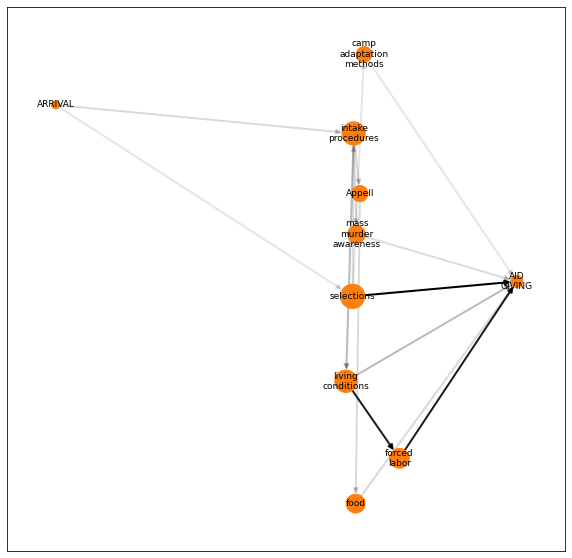

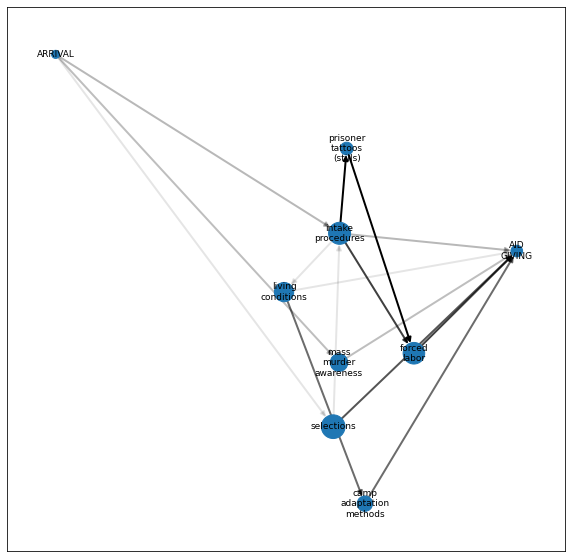

In [27]:
flux = 0.22
story_start = 'arrival'
story_end = 'aid giving'
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None,gender="w")
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None,gender="m")

### Quantitative evidence 2

In [28]:
story_start = 'living conditions'
story_end = 'aid giving'
state_index = features_df.KeywordLabel.to_list()

In [29]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.6)

In [30]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.6)

Print the most important pathways for women

In [31]:
print_paths(flux_w,max_length=3)

living conditions-forced labor-aid giving:6.644852704834613


living conditions-selections-aid giving:5.49480820524713


living conditions-aid giving:4.41727902159691


living conditions-food-aid giving:3.0176115426843424


living conditions-camp adaptation methods-aid giving:2.93369258810111


living conditions-mass murder awareness-aid giving:2.9208802290515443


living conditions-Appell-aid giving:2.0333141829806185


living conditions-family interactions-aid giving:1.7830534367901543


living conditions-social relations-aid giving:1.6468032612124612


living conditions-Blockälteste-aid giving:1.429720735773783


living conditions-Mengele, Josef-aid giving:1.3116935209081233


living conditions-extended family members-aid giving:1.225256479914632


living conditions-diseases-aid giving:1.1816200606378289


living conditions-brutal treatment-aid giving:1.1548765577453064


living conditions-sanitary conditions-aid giving:1.1293335996547802


living conditions-prisoner physical condit

Print the most important pathways for men

In [32]:
print_paths(flux_m,max_length=3)

living conditions-forced labor-aid giving:6.564598702399665


living conditions-camp adaptation methods-aid giving:4.418183725641468


living conditions-selections-aid giving:3.4716225819395192


living conditions-aid giving:2.864782811314227


living conditions-mass murder awareness-aid giving:2.4899964842110607


living conditions-housing conditions-aid giving:1.607654263435528


living conditions-social relations-aid giving:1.5724494636956963


living conditions-brutal treatment-aid giving:1.527230104100218


living conditions-Appell-aid giving:1.4497261529085586


living conditions-family interactions-aid giving:1.1193179797563595


living conditions-diseases-aid giving:1.0008377855366164


living conditions-food-aid giving:0.8777827894079168


living conditions-extended family members-aid giving:0.8011126426628057


living conditions-prisoner tattoos (stills)-aid giving:0.7941081830611724


living conditions-Roma prisoners-aid giving:0.7727275732775821


living conditions-psycholo

Print similar pathways

In [33]:
print_similar_paths(flux_w,flux_m)

living conditions-Blockälteste-aid giving
Women: 1.429720735773783
Men: 0.47926944203580396


living conditions-selections-intake procedures-aid giving
Women: 1.9239348755373293
Men: 2.3824615592877563


living conditions-family interactions-aid giving
Women: 1.7830534367901543
Men: 1.1193179797563595


living conditions-selections-aid giving
Women: 5.49480820524713
Men: 3.4716225819395192


living conditions-Jewish prisoners-aid giving
Women: 0.45617669074508144
Men: 0.49289757042619026


living conditions-prisoner tattoos (stills)-aid giving
Women: 0.4817903683887647
Men: 0.7941081830611724


living conditions-SS/SD personnel-aid giving
Women: 0.4497705565320235
Men: 0.7492489217088621


living conditions-extended family members-aid giving
Women: 1.225256479914632
Men: 0.8011126426628057


living conditions-brutal treatment-aid giving
Women: 1.1548765577453064
Men: 1.527230104100218


living conditions-aid giving
Women: 4.41727902159691
Men: 2.864782811314227


living conditions-dise

### Visualize

6 labels to show
7 labels to show


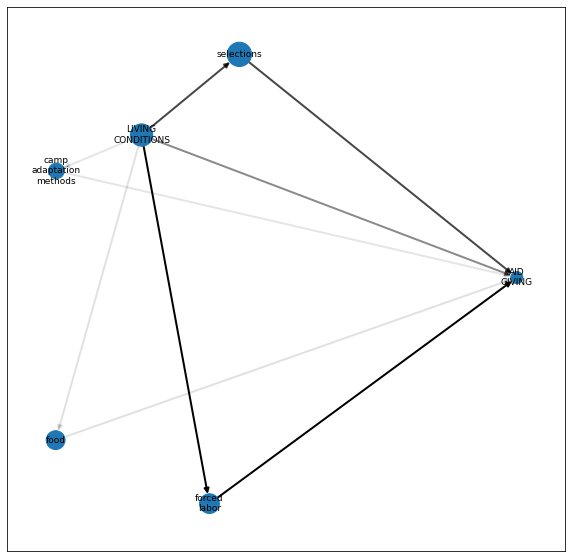

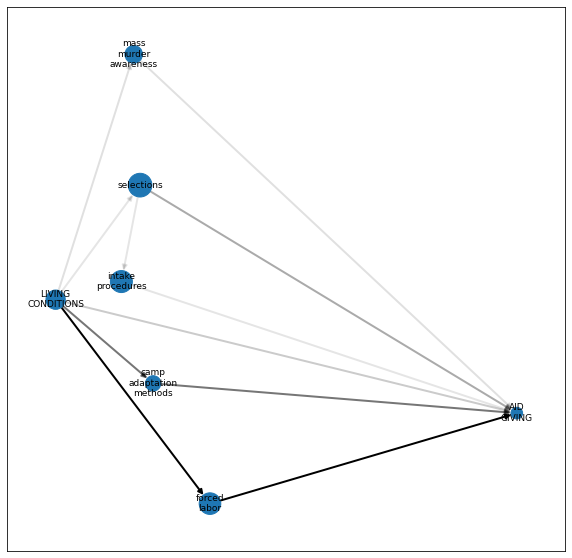

In [34]:
flux=0.2
story_start = 'living conditions'
story_end = 'aid giving'
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

In [35]:
story_start = 'forced labor'
story_end = 'aid giving'
state_index = features_df.KeywordLabel.to_list()

In [36]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.8)

In [37]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.8)

Print most important path for women

In [38]:
print_paths(flux_w,max_length=2)

forced labor-aid giving:9.614637716359173




Print most important path for men

In [39]:
print_paths(flux_m,max_length=2)

forced labor-aid giving:11.357897171905321




### Quantitative evidence 3

Aid giving is more likely to follow forced labor for men than for women.

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


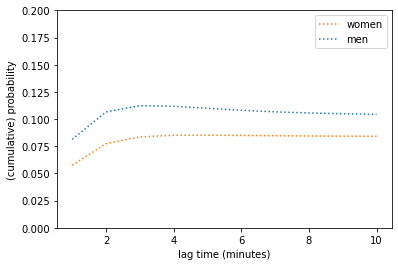

In [40]:
_msmlags = np.arange(1, 11)

#somehow there are topics that are not present in the feature dataframe. exclude those.
_topic_map_forced_labor = features_df[features_df.KeywordLabel.isin(topic_map_forced_labor)].KeywordLabel.tolist()

# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, ['aid giving','food sharing'], _topic_map_forced_labor, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, ['aid giving','food sharing'], _topic_map_forced_labor, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)
plt.savefig('Figure_4_solidarity_following_forced_labor.png')

In [41]:
probs_w

array([[0.01327012, 0.05752937],
       [0.01922129, 0.07737269],
       [0.0210241 , 0.08359109],
       [0.02122454, 0.08512632],
       [0.02094541, 0.08520857],
       [0.02061198, 0.08494372],
       [0.020356  , 0.08466387],
       [0.02019312, 0.08444325],
       [0.02010218, 0.08428157],
       [0.02005726, 0.08416359]])

Aid giving is more likely to follow living conditions for women than for men.

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


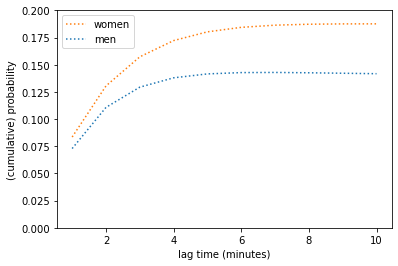

In [42]:
_msmlags = np.arange(1, 11)

#somehow there are topics that are not present in the feature dataframe. exclude those.
_topic_map_living_conditions = features_df[features_df.KeywordLabel.isin(topic_map_living_conditions)].KeywordLabel.tolist()

# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags
                             .shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, ['aid giving','food sharing'], _topic_map_living_conditions, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, ['aid giving','food sharing'], _topic_map_living_conditions, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)
plt.savefig('Figure_4_solidarity_following_living_conditions.png')

## Observation 2

### Qualitative description

As above, a key topic that follows the discussion of aid giving is forced labour. However, this has different weight in the narratives of men and women. Men are more likely to discuss forced labour following aid giving. By contrast, women are more likely to discuss housing and living conditions.

The traffic going through the following two paths are different for men and women.

aid giving-forced labor <br/>
Women: 5.892215934536441 <br/>
Men: 9.179672557709363<br/>

aid giving-living conditions <br/>
Women: 4.989195032183169 <br/>
Men: 3.940806972832768 <br/>




### Quantitative evidence 1

In [43]:
story_start = 'aid giving'
story_end = 'departure'
flux = 1

In [44]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [45]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Print those paths where forced labor follow aid giving for women

In [46]:
result = []

for path in flux_w:
    if len(path.split('aid giving-forced labor-'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

aid giving-forced labor-departure
2.729615878149417


aid giving-forced labor-food-selections-intake procedures-clothing-departure
0.8289941816137721


aid giving-forced labor-Mengele, Josef-intake procedures-housing conditions-social relations-departure
0.5123192060883652


aid giving-forced labor-food-sanitary conditions-physical hygiene maintenance-Allied military operations-departure
0.07939032173836087




Print the total amount of traffic going through these nodes

In [47]:
print (np.array(result).sum())

4.150319587589915


Print those paths where forced labor follow aid giving for men

In [48]:
result = []

for path in flux_m:
    if len(path.split('aid giving-forced labor-'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

aid giving-forced labor-departure
2.419447465169811


aid giving-forced labor-politico-military event awareness-departure
1.3753853668599314


aid giving-forced labor-food acquisition-departure
1.3548259776625782


aid giving-forced labor-brutal treatment-departure
0.8978199621392627


aid giving-forced labor-food-departure
0.7325144039431399


aid giving-forced labor-Polish prisoners-food-arrival-selections-intake procedures-prisoner tattoos-prisoner tattoos (stills)-Greek prisoners-departure
0.1755589977565027




Print the total amount of traffic going through these nodes

In [49]:
print (np.array(result).sum())

6.955552173531227


Print those paths where living conditions follow aid giving for women

In [50]:
result = []

for path in flux_w:
    if len(path.split('aid giving-living conditions-'))>1 or len(path.split('aid giving-housing conditions-'))>1:
        result.append(flux_w[path])
        print (path)
        print (flux_w[path])
        print ('\n')
print (np.array(result).sum())

aid giving-living conditions-selections-transfer to camps-departure
2.5186672379147437


aid giving-living conditions-departure
0.9061933059574302


aid giving-housing conditions-departure
0.858767429384422


aid giving-living conditions-forced labor-bombardments-departure
0.29979033327307114


aid giving-housing conditions-Appell-forced labor-food acquisition-hiding and evasion-departure
0.19114332279584606


aid giving-living conditions-loved ones' renewed contacts-loved ones' fates-prisoner tattoos-showers-clothing-shoes-Mengele, Josef-arrival-selections-transfer to camps-forced march conditions-forced march guards-departure
0.006853354589021589


aid giving-living conditions-Appell-SS/SD personnel-intake procedures-gas chambers-doctors-departure
0.00236503017630821


4.783780014090842


Print the total amount of traffic going through these nodes

In [51]:
print (np.array(result).sum())

4.783780014090842


Print those paths where living conditions follow aid giving for men

In [52]:
result = []

for path in flux_m:
    if len(path.split('aid giving-living conditions-'))>1 or len(path.split('aid giving-housing conditions-'))>1:
        result.append(flux_m[path])
        print (path)
        print (flux_m[path])
        print ('\n')

aid giving-living conditions-camp adaptation methods-departure
1.6736271018173552


aid giving-living conditions-Appell-selections-intake procedures-prisoner tattoos (stills)-departure
1.0886399886292712


aid giving-housing conditions-living conditions-transfer to camps-transfer conditions-perpetrator liberator-approach responses-departure
0.7409143120709982


aid giving-housing conditions-food-Soviet prisoners-departure
0.2652825562797484


aid giving-living conditions-food-latrines-departure
0.06391810038896792


aid giving-living conditions-food-gas chambers-psychological reactions-Roma prisoners-prisoner tattoos-criminal prisoners-survival explanations-attitudes-Holocaust testimony sharing reluctance-Holocaust testimony sharing willingness-post-World War II reflections-transfer to camps-transfer deaths-transfer killings-Ukrainian prisoners-departure
0.004501601303121171


aid giving-housing conditions-camp procedures-forced labor-prisoner identification numbers-prisoner tattoos (s

Print the total amount of traffic going through these nodes

In [53]:
print (np.array(result).sum())

3.843028649873207


### Visualization

9 labels to show
12 labels to show


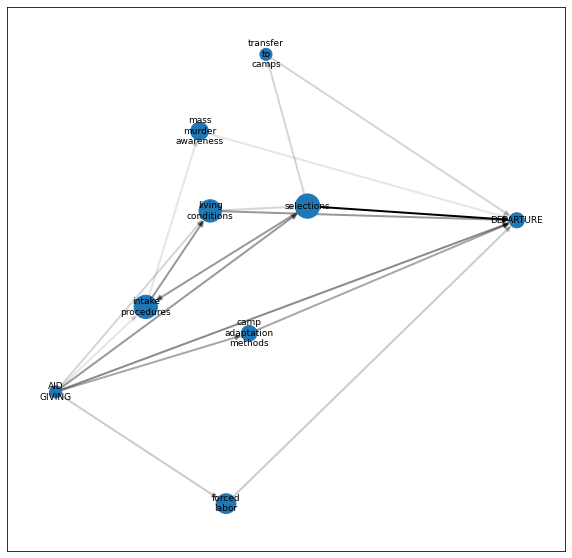

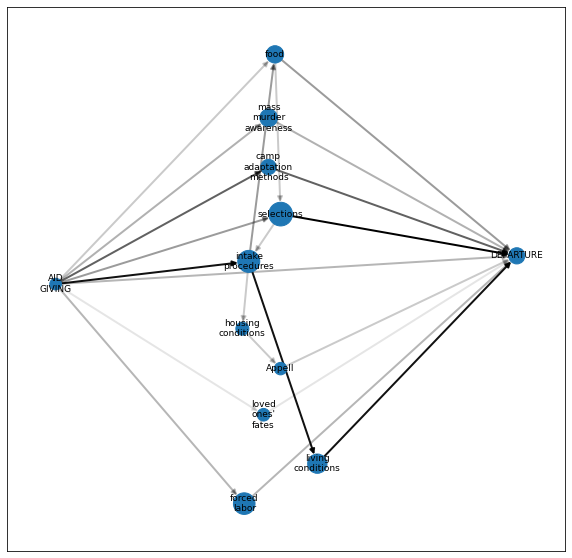

In [54]:
flux = 0.25
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

In [55]:
story_start = 'aid giving'
story_end = 'living conditions'

In [56]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

Print the amount of traffic going between them for women and men

In [57]:
print_similar_paths(flux_w,flux_m,max_length=2)

aid giving-living conditions
Women: 4.989195032183165
Men: 3.940806972832773




In [58]:
story_start = 'aid giving'
story_end = 'forced labor'
state_index = features_df.KeywordLabel.to_list()

In [59]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

In [60]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

Print the amount of traffic going between them for women and men

In [61]:
print_similar_paths(flux_w,flux_m,max_length=3)

aid giving-brutal treatment-forced labor
Women: 0.9538649805385722
Men: 1.3315739039334042


aid giving-camp adaptation methods-forced labor
Women: 2.9449300890535888
Men: 1.917984208577585


aid giving-mass murder awareness-forced labor
Women: 2.509604637938198
Men: 2.44160332004802


aid giving-forced labor
Women: 5.892215934536437
Men: 9.179672557709374


aid giving-loved ones' fates-forced labor
Women: 1.4882000001663975
Men: 2.0051237205602868


aid giving-social relations-forced labor
Women: 1.359331513101842
Men: 1.1786068466169186




### Quantitative evidence 3

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


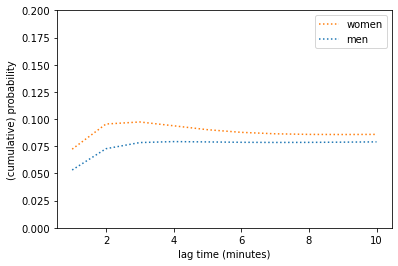

In [62]:
_msmlags = np.arange(1, 11)

#somehow there are topics that are not present in the feature dataframe. exclude those.
#_topic_map_forced_labor = features_df[features_df.KeywordLabel.isin(topic_map_forced_labor)].KeywordLabel.tolist()

# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, _topic_map_forced_labor, ['aid giving'],
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, _topic_map_forced_labor, ['aid giving'], 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


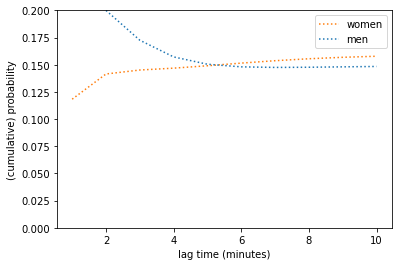

In [63]:
_msmlags = np.arange(1, 11)

#somehow there are topics that are not present in the feature dataframe. exclude those.
#_topic_map_forced_labor = features_df[features_df.KeywordLabel.isin(topic_map_forced_labor)].KeywordLabel.tolist()

# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, _topic_map_living_conditions, ['aid giving'],
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, _topic_map_living_conditions, ['aid giving'], 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 3

### Qualitative description

Similarly to aid giving, women are more likely to discuss food sharing following living conditions, whereas men discuss it following forced labour. 

The total amount of traffic going through the following two paths for women is 11,8 % and for men it is 8.8%:

living conditions-food-food sharing

living conditions-food sharing

At the same time, the total traffic going through the following paths is different for men (18.3%) and women 15.2):

forced labor-food sharing

forced labor-food-food sharing


### Quantitative evidence 1

In [64]:
story_start = 'arrival'
story_end = 'food sharing'
flux = 1

In [65]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [66]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Print those paths where living and housing conditions prime food sharing for women

In [67]:
result = []

for path in flux_w:
    if len(path.split('-living conditions-food sharing'))>1 or len(path.split('-housing conditions-food sharing'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

arrival-intake procedures-living conditions-food sharing
4.756063911165259


arrival-loved ones' separations-intake procedures-housing conditions-food sharing
1.7558327389821335




Print the total amount of traffic going through these nodes

In [68]:
print (np.array(result).sum())

6.511896650147392


Print those paths where living and housing conditions prime food sharing for men

In [69]:
result = []

for path in flux_m:
    if len(path.split('-living conditions-food sharing'))>1 or len(path.split('-housing conditions-food sharing'))>1:
        result.append(flux_m[path])
        print (path)
        print (flux_m[path])
        print ('\n')

arrival-intake procedures-housing conditions-food sharing
2.580383533099844


arrival-Mengele, Josef-intake procedures-living conditions-food sharing
2.0096729520780405




Print the total amount of traffic going through these nodes

In [70]:
print (np.array(result).sum())

4.590056485177884


Print those paths where forced labor prime food sharing for women

In [71]:
result = []

for path in flux_w:
    if len(path.split('-forced labor-food sharing'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

arrival-intake procedures-living conditions-forced labor-food sharing
8.91702318142021




Print the total amount of traffic going through these nodes

In [72]:
print (np.array(result).sum())

8.91702318142021


Print those paths where forced labor prime food sharing for men

In [73]:
result = []

for path in flux_m:
    if len(path.split('-forced labor-food sharing'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

arrival-selections-intake procedures-prisoner tattoos (stills)-forced labor-food sharing
9.639128777435241


arrival-loved ones' separations-intake procedures-prisoner tattoos-forced labor-food sharing
3.2095961275346787




Print the total amount of traffic going through these nodes

In [74]:
print (np.array(result).sum())

12.84872490496992


### Visualization

10 labels to show
8 labels to show


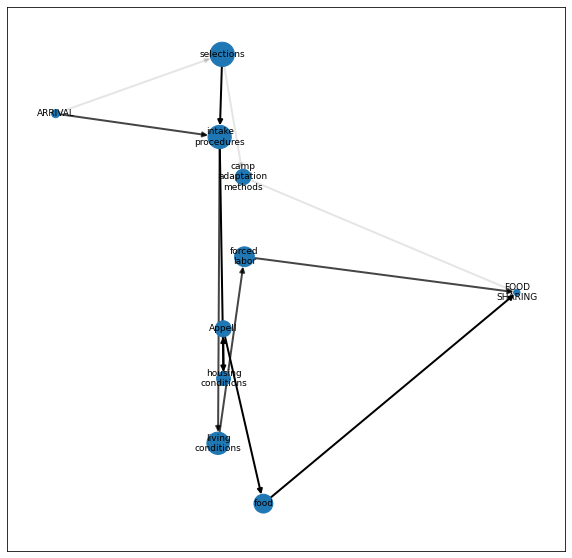

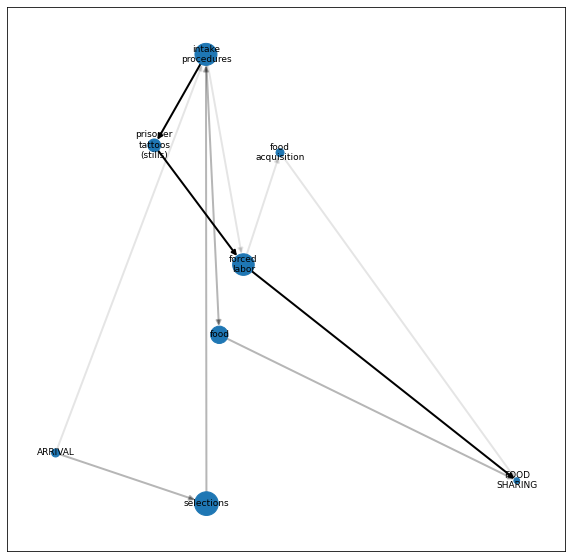

In [75]:
flux = 0.2
story_start = 'arrival'
story_end = 'food sharing'
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

In [76]:
story_start = 'forced labor'
story_end = 'food sharing'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

In [77]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

In [78]:
print_similar_paths(flux_w,flux_m,max_length=3)

forced labor-family interactions-food sharing
Women: 1.6275910621913872
Men: 1.3904119987254433


forced labor-punishments-food sharing
Women: 0.7885042282911499
Men: 1.0904369991461804


forced labor-food-food sharing
Women: 5.552864805475943
Men: 4.795520605873538


forced labor-camp adaptation methods-food sharing
Women: 4.080364617672331
Men: 2.4193054360721087


forced labor-food sharing
Women: 9.756762640497591
Men: 13.675652985006924


forced labor-food acquisition-food sharing
Women: 1.5327620312352606
Men: 3.2672603853928055


forced labor-living conditions-food sharing
Women: 4.3171992116512
Men: 1.6368799157199998


forced labor-aid giving-food sharing
Women: 2.71027761280742
Men: 2.6220261238461835


forced labor-social relations-food sharing
Women: 1.14574824751466
Men: 1.73968140084559




In [79]:
story_start = 'living conditions'
story_end = 'food sharing'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

In [80]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

In [81]:
print_similar_paths(flux_w,flux_m,max_length=3)

living conditions-food-food sharing
Women: 6.721787138212146
Men: 6.703548523028338


living conditions-family interactions-food sharing
Women: 1.775657348474395
Men: 1.5324319633189338


living conditions-mass murder awareness-food sharing
Women: 1.1748144929397966
Men: 1.1749727126144867


living conditions-departure-food sharing
Women: 1.2830918633566697
Men: 2.8807665525418824


living conditions-social relations-food sharing
Women: 1.2346546573626775
Men: 1.549009807716847


living conditions-food sharing
Women: 5.116161552774545
Men: 2.1858927355790523


living conditions-forced labor-food sharing
Women: 6.649372316004652
Men: 6.80069640209135




### Quantitative evdience 3

Food sharing is more likely to follow forced labor for men than for women.

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


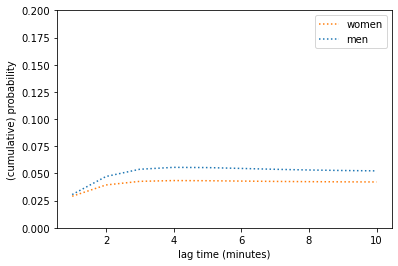

In [82]:
_msmlags = np.arange(1, 11)

topic_1 = ["food sharing"]
topic_2  = topic_map_forced_labor
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

Food sharing is more likely to follow camp living conditions for women than for men.

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


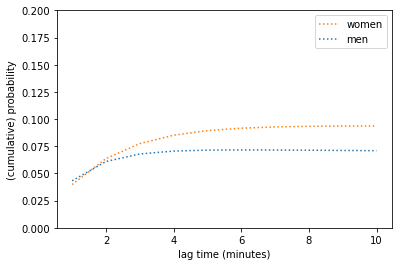

In [83]:
_msmlags = np.arange(1, 11)

topic_1 = ["food sharing"]
topic_2  = topic_map_living_conditions
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 4

### Qualitative description

In testimonies of men and women, both living conditions and forced labour are discussed following food sharing. There is no difference in terms of the amount of the traffic that goes from food sharing to forced labour.

food sharing-forced labor <br/>
Women: 5.60066015579362  <br/>
Men: 5.661811177443069  <br/>

However, in case of men more traffic is going from food sharing towards living conditions:

food sharing-living conditions <br/>
Women: 4.612779648936039  <br/>
Men: 5.4796159931673705  <br/>

### Quantitative evidence 1

In [84]:
story_start = 'food sharing'
story_end = 'departure'
flux = 1

In [85]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [86]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Print those paths where forced labor follow food sharing for women

In [87]:
result = []

for path in flux_w:
    next_state = path.split('-')[1]
    if next_state =='forced labor':
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

food sharing-forced labor-departure
2.766659638469877


food sharing-forced labor-food-departure
1.7959111395688245


food sharing-forced labor-Holocaust-related psychological reactions-departure
0.439307890490476


food sharing-forced labor-German soldiers-intake procedures-living conditions-camp adaptation methods-famous French politicians and diplomats-departure
0.0791808435187665


food sharing-forced labor-German camp guards-living conditions-Slovak prisoners-departure
0.008502186740409312




Print the total amount of traffic going through these nodes

In [88]:
print (np.array(result).sum())

5.089561698788354


Print those paths where forced labor follow food sharing for men

In [89]:
result = []

for path in flux_m:
    next_state = path.split('-')[1]
    if next_state in topic_map_forced_labor:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

food sharing-forced labor-food-selections-intake procedures-living conditions-camp adaptation methods-departure
2.427190483267283


food sharing-forced labor-departure
2.4188250384151053


food sharing-forced labor-food acquisition-Sonderkommando prisoners-departure
0.3474959705061975


food sharing-forced labor-punishments-brutal treatment-living conditions-camp procedures-Jewish prayers-selections-camp adaptation methods-identity concealment-Gestapo personnel-departure
0.062652493559951


food sharing-forced labor-covert economic activities-departure
0.024812356848908066




Print the total amount of traffic going through these nodes

In [90]:
print (np.array(result).sum())

5.280976342597445


Print those paths where living conditions follow food sharing for women

In [91]:
result = []

for path in flux_w:
    next_state = path.split('-')[1]
    if next_state =='living conditions':
        result.append(flux_w[path])
        print (path)

food sharing-living conditions-departure


Print the total amount of traffic going through these nodes

In [92]:
print (np.array(result).sum())

4.261560027826919


Print those paths where living conditions follow food sharing for men

In [93]:
result = []

for path in flux_m:
    next_state = path.split('-')[1]
    if next_state =="living conditions":
        result.append(flux_m[path])
        print (path)

food sharing-living conditions-departure
food sharing-living conditions-freight trains-transfer-related aid giving-departure
food sharing-living conditions-camp procedures-hospitals-departure
food sharing-living conditions-food-food acquisition-beatings-restitution-post-World War II reflections-Jewish prayers-future message-concentration camps (stills)-departure


Print the total amount of traffic going through these nodes

In [94]:
print (np.array(result).sum())

5.036024615514616


### Visualization

9 labels to show
9 labels to show


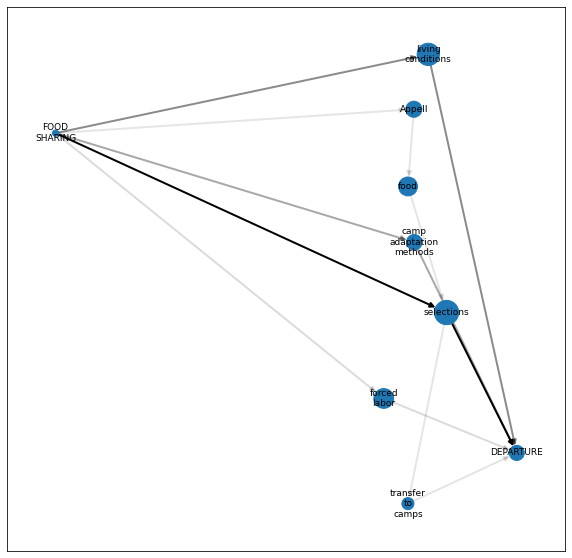

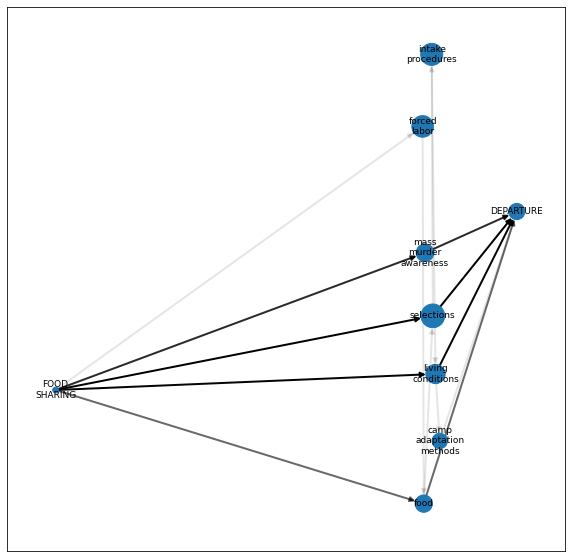

In [95]:
flux = 0.19
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

In [96]:
story_start = 'food sharing'
story_end = 'forced labor'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

In [97]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

In [98]:
print_similar_paths(flux_w,flux_m,max_length=2)

food sharing-forced labor
Women: 5.600660155793619
Men: 5.661811177443067




In [99]:
story_start = 'food sharing'
story_end = 'living conditions'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

In [100]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

In [101]:
print_similar_paths(flux_w,flux_m,max_length=3)

food sharing-social relations-living conditions
Women: 1.0806550552610896
Men: 1.2466833118305254


food sharing-camp adaptation methods-living conditions
Women: 2.27584004949964
Men: 1.7006218532729758


food sharing-family interactions-living conditions
Women: 1.49543418512038
Men: 1.3107774817215818


food sharing-living conditions
Women: 4.612779648936042
Men: 5.479615993167375


food sharing-prisoner tattoos-living conditions
Women: 1.5524268062483582
Men: 0.9075146039334988


food sharing-mass murder awareness-living conditions
Women: 2.2444435408783017
Men: 4.173766718918274


food sharing-forced labor-living conditions
Women: 3.7953376641668948
Men: 5.274539743957041




## Observation 5 A

### Qualitative description

Women tend to discuss social bonds following living environment, whereas men tend to discuss it following forced labour. Different amount of traffic is going through the following paths in case of women (5.3 %) and men (4.3 %):

living conditions-social relations

Different amount of traffic is going through the following paths in case of women (4.6 %) and men (8.6 %):

forced labor-social relations

Finally, food is an key transitionary topic between social relations and living environment for women:

living conditions-food-social relations <br/>
Women: 6.434011448725096<br/>
Men: 3.5924098744045265<br/>

Similarly, food is an key transitionary topic between forced labour and living environment for women:

forced labor-food-social relations<br/>
Women: 5.672980573742698<br/>
Men: 3.5486202551343533<br/>

## Quantitative evidence 1

In [102]:
story_start = 'arrival'
story_end = 'social relations'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Print those paths where forced labor prime social relations for women

In [103]:
result = []

for path in flux_w:
    if len(path.split('-forced labor-social relations'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

arrival-intake procedures-living conditions-forced labor-social relations
3.391164237137583




Print the total amount of traffic going through these nodes

In [104]:
print (np.array(result).sum())

3.391164237137583


Print those paths where forced labor prime social relations for men

In [105]:
result = []

for path in flux_m:
    if len(path.split('-forced labor-social relations'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

arrival-selections-intake procedures-prisoner tattoos (stills)-forced labor-social relations
5.245297375390988


arrival-loved ones' separations-intake procedures-prisoner tattoos-forced labor-social relations
1.6455694762081314




Print the total amount of traffic going through these nodes

In [106]:
print (np.array(result).sum())

6.89086685159912


Print those paths where living conditions prime social relations for women

In [107]:
result = []

for path in flux_w:
    if len(path.split('living conditions-social relations'))>1:
        result.append(flux_w[path])
        print (path)
        print (flux_w[path])
        print ('\n')

arrival-intake procedures-living conditions-social relations
5.385387680048895




Print the total amount of traffic going through these nodes

In [108]:
print (np.array(result).sum())

5.385387680048895


Print those paths where living conditions prime social relations for men

In [109]:
result = []

for path in flux_m:
    if len(path.split('living conditions-social relations'))>1:
        result.append(flux_m[path])
        print (path)
        print (flux_m[path])
        print ('\n')

arrival-selections-intake procedures-living conditions-social relations
4.395672199902192




Print the total amount of traffic going through these nodes

In [110]:
print (np.array(result).sum())

4.395672199902192


### Quantitative evidence 2

In [111]:
story_start = 'living conditions'
story_end = 'social relations'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.6)

In [112]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.6)

In [113]:
print_similar_paths(flux_w,flux_m,max_length=4)

living conditions-beatings-social relations
Women: 0.5657435809855753
Men: 0.9378864184374358


living conditions-brutal treatment-social relations
Women: 1.322646820348963
Men: 0.9438044393542758


living conditions-food-social relations
Women: 6.4340114487250935
Men: 3.592409874404524


living conditions-camp adaptation methods-social relations
Women: 2.6114993411775855
Men: 4.196415296183543


living conditions-family interactions-social relations
Women: 1.5782855274676968
Men: 1.4320103091848742


living conditions-social relations
Women: 6.827380319447991
Men: 5.75760531955296


living conditions-aid giving-social relations
Women: 1.0971576289754268
Men: 0.8210229584510839


living conditions-forced labor-social relations
Women: 3.412751411600272
Men: 6.339281279218219


living conditions-diseases-social relations
Women: 0.666313397424443
Men: 0.9807303343194207


living conditions-mass murder awareness-social relations
Women: 3.486350392156012
Men: 1.5278997594650114


living con

### Visualize

8 labels to show
8 labels to show


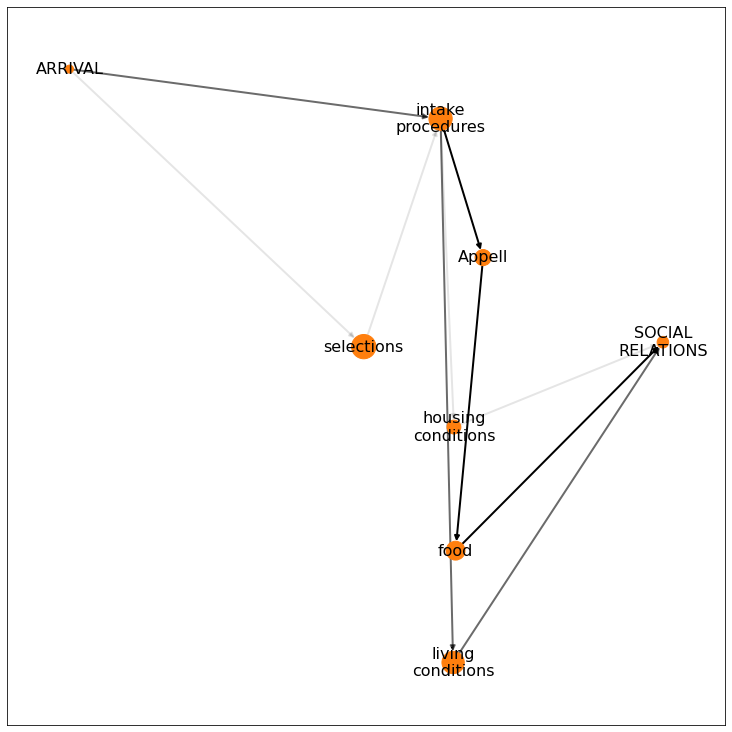

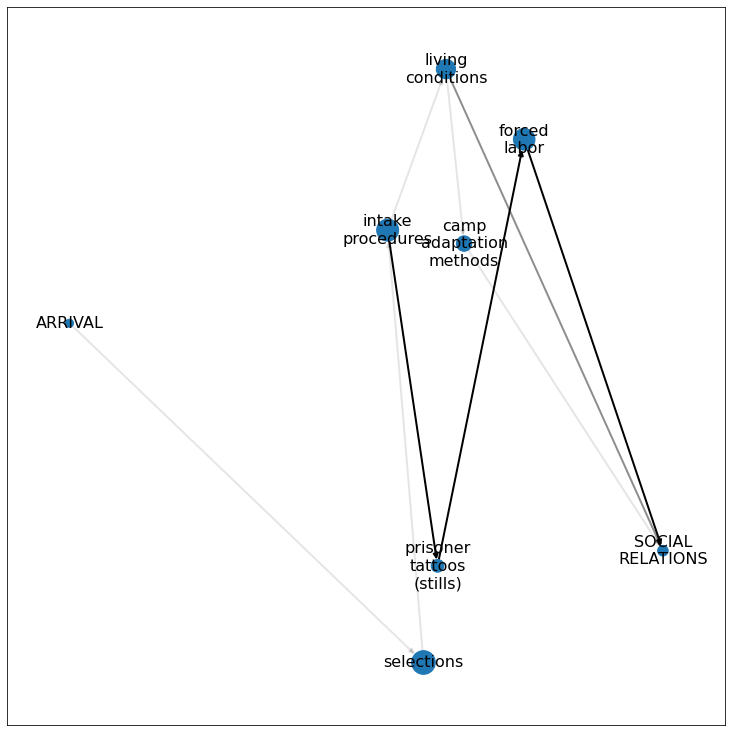

In [16]:
flux = 0.13
from markov_modelling.markov_utils import *
story_start = 'arrival'
story_end = 'social relations'
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None,gender="w")
plt.tight_layout(pad=0.1)

plt.savefig("figure_5_w.png")
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None,gender="m")
plt.tight_layout(pad=0.1)
plt.savefig("figure_5_m.png")

In [115]:
story_start = 'forced labor'
story_end = 'social relations'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

In [116]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

In [117]:
print_similar_paths(flux_w,flux_m,max_length=3)

forced labor-camp adaptation methods-social relations
Women: 2.6386279118160574
Men: 2.6016146198860026


forced labor-food-social relations
Women: 5.6729805737426995
Men: 3.5486202551343546


forced labor-social relations
Women: 4.6050759434034685
Men: 8.646552501301697


forced labor-aid giving-social relations
Women: 1.5790574903532897
Men: 1.4366675462970075


forced labor-mass murder awareness-social relations
Women: 3.268274761410368
Men: 1.5066932736981837


forced labor-family interactions-social relations
Women: 1.5824664354515985
Men: 1.3985046917114738


forced labor-living conditions-social relations
Women: 4.594337462219915
Men: 4.087350558219836




### Visualization

7 labels to show
4 labels to show


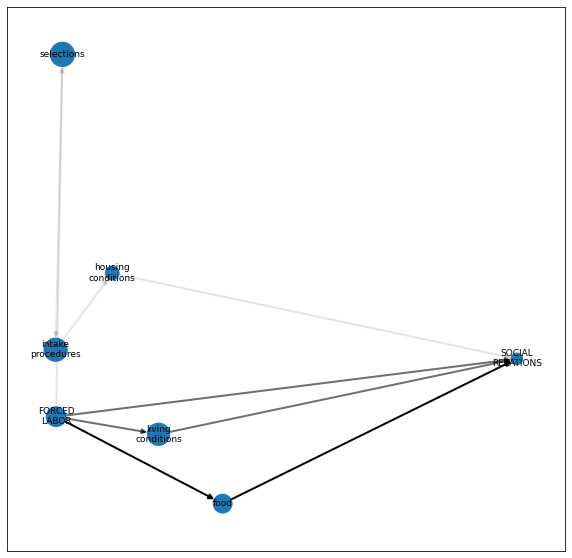

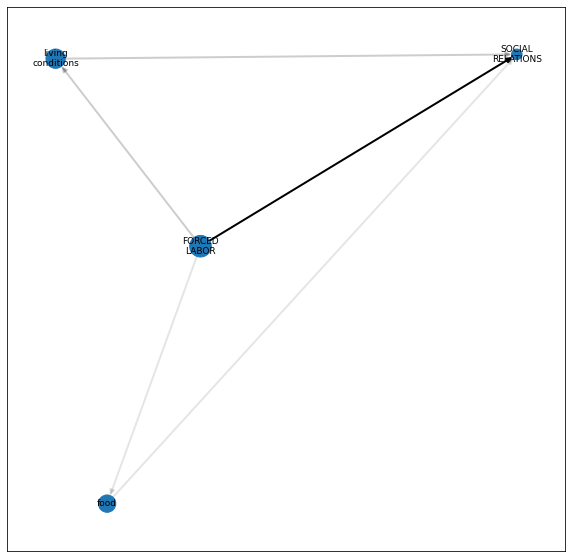

In [118]:
flux = 0.16
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evdience 3

Social relations are more likely to follow forced labor for men than for women.

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


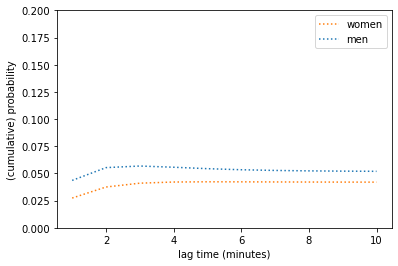

In [119]:
_msmlags = np.arange(1, 11)

topic_1 = ["social relations"]
topic_2  = topic_map_forced_labor
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

Social relations are more likely to follow camp living conditions for women than for men.

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


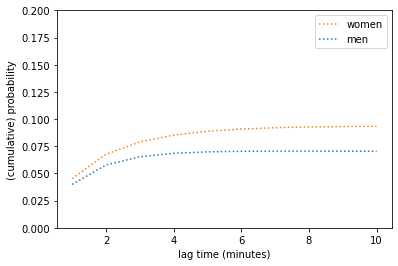

In [120]:
_msmlags = np.arange(1, 11)

topic_1 = ["social relations"]
topic_2  = topic_map_living_conditions
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 5

### Qualitative description

In narratives of both women and men, the discussion of friendship tends to be preceded by the discussion of living environments and forced labor. For women,  the discussion of friendship followng living environment is stronger:

living conditions-friends <br/>
Women: 7.186269105921992 <br/>
Men: 4.987467244255548 <br/>

An important transitionary topic between living conditions and friends is food:

living conditions-food-friends <br/>
Women: 3.7173273244734077 <br/>
Men: 2.806933358478007 <br/>

But this is stronger for women.

Another important transitionary topic between them is camp adaptation methods, which is stronger for men:

living conditions-camp adaptation methods-friends <br/>
Women: 2.8453985144436293 <br/>
Men: 3.213141994177019 <br/>

For women and men, the traffic between forced labor and friends is equal:

forced labor-friends <br/>
Women: 5.134709271710951 <br/>
Men: 4.946899219077014 <br/>

But the probability of transition from forced labor to friends is higher for men.

### Quantitative evidence 1

In [121]:
story_start = 'arrival'
story_end = 'friends'
flux = 0.2
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [122]:
flux_w

{'arrival-selections-intake procedures-living conditions-friends': 6.591571087747818,
 'arrival-selections-friends': 5.346033588653369,
 'arrival-intake procedures-friends': 4.997179746503235,
 'arrival-intake procedures-living conditions-forced labor-friends': 4.5900985692881004}

In [123]:
flux_m

{'arrival-selections-intake procedures-prisoner tattoos (stills)-forced labor-friends': 4.670007587156472,
 'arrival-selections-intake procedures-living conditions-friends': 4.656311759024229,
 'arrival-selections-friends': 4.247463413536616,
 'arrival-intake procedures-prisoner tattoos (stills)-mass murder awareness-friends': 3.9316874149391055,
 'arrival-selections-intake procedures-living conditions-camp adaptation methods-friends': 3.216155454739148}

Print those paths where forced labor prime friends for women

In [124]:
result = []

for path in flux_w:
    if len(path.split('-forced labor-friends'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

arrival-intake procedures-living conditions-forced labor-friends
4.5900985692881004




Print the total amount of traffic going through these nodes

In [125]:
print (np.array(result).sum())

4.5900985692881004


Print those paths where forced labor prime aid giving for men

In [126]:
result = []

for path in flux_m:
    if len(path.split('-forced labor-friends'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])


arrival-selections-intake procedures-prisoner tattoos (stills)-forced labor-friends
4.670007587156472




Print the total amount of traffic going through these nodes

In [127]:
print (np.array(result).sum())

4.670007587156472


Print those paths where living conditions prime friends for women

In [128]:
result = []

for path in flux_w:
    if len(path.split('living conditions-friends'))>1:
        result.append(flux_w[path])
        print (path)
        print (flux_w[path])
        print ('\n')

arrival-selections-intake procedures-living conditions-friends
6.591571087747818




Print the total amount of traffic going through these nodes

In [129]:
print (np.array(result).sum())

6.591571087747818


Print those paths where forced labor prime aid giving for men

In [130]:
result = []

for path in flux_m:
    if len(path.split('living conditions-friends'))>1:
        result.append(flux_m[path])
        print (path)
        print (flux_m[path])
        print ('\n')

arrival-selections-intake procedures-living conditions-friends
4.656311759024229




Print the total amount of traffic going through these nodes

In [131]:
print (np.array(result).sum())

4.656311759024229


### Visualize

6 labels to show
9 labels to show


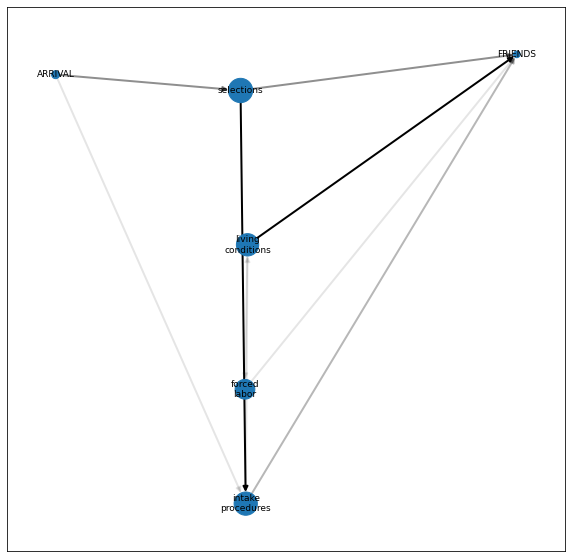

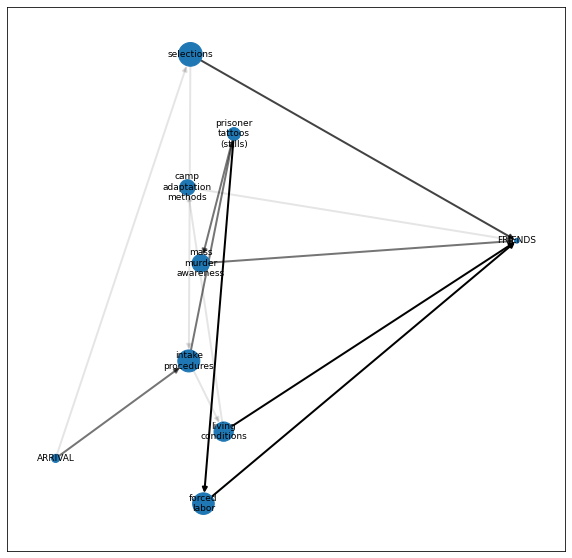

In [132]:
flux = 0.2
story_start = 'arrival'
story_end = 'friends'
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 1

In [133]:
story_start = 'living conditions'
story_end = 'friends'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

In [134]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

In [135]:
print_similar_paths(flux_w,flux_m)

living conditions-mass murder awareness-friends
Women: 2.5209746424493535
Men: 3.9121621828375734


living conditions-food-friends
Women: 3.717327324473405
Men: 2.8069333584780125


living conditions-friends
Women: 7.1862691059219905
Men: 4.987467244255553


living conditions-camp adaptation methods-friends
Women: 2.8453985144436267
Men: 3.2131419941770245


living conditions-selections-friends
Women: 5.262289350675575
Men: 4.181861662662028


living conditions-forced labor-friends
Women: 4.607510882266443
Men: 4.6700500543924965




### Visualize it

5 labels to show
6 labels to show


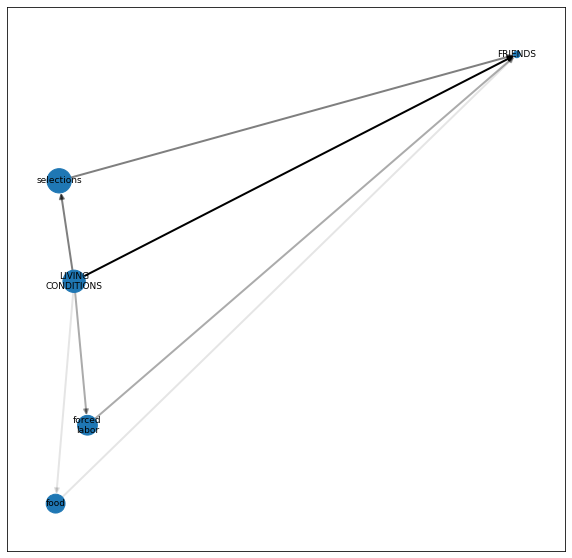

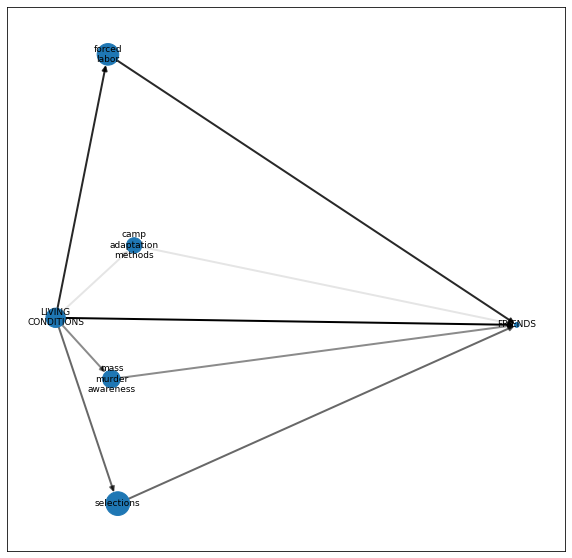

In [136]:
flux = 0.2
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

In [137]:
story_start = 'forced labor'
story_end = 'friends'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

In [138]:
story_start = 'living conditions'
story_end = 'friends'
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

In [139]:
print_similar_paths(flux_w,flux_m)

### Quantitative evdience 3

Friends are more likely to follow forced labor for men than for women.

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


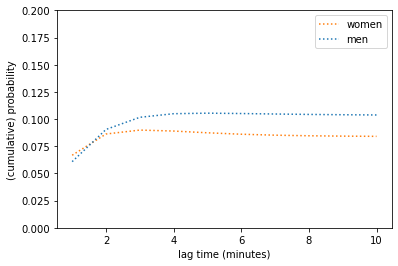

In [140]:
_msmlags = np.arange(1, 11)

topic_1 = ["friends","social relations"]
topic_2  = topic_map_forced_labor
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)
plt.savefig("figure_4_social_bonds_following_forced_labor.png")

Friends are more likely to follow camp living conditions for women than for men.

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


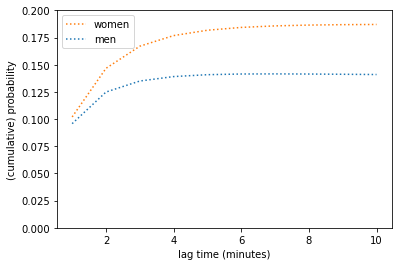

In [141]:
_msmlags = np.arange(1, 11)

topic_1 = ["friends","social relations"]
topic_2  = topic_map_living_conditions
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)
plt.savefig("figure_4_social_bonds_following_living_conditions.png")

## Observation 6

### Qualitative description

Women are more likely to discuss living conditions following friendship than man do. Similarly women are more likely to discuss forced laboru followng friendship:

friends-living conditions <br/>
Women: 3.535931711450818 <br/>
Men: 2.198317704062195 <br/>

For women food is an important transitionary topic:

friends-food-living conditions:3.5758882151694316


Similarly, women are much more likely to follow with forced labour after friendship:

friends-forced labor <br/>
Women: 7.431426222661657 <br/>
Men: 2.6768092638626446 <br/>

Aid giving is a more important transitionary topic between friends and forced labor:

friends-aid giving-forced labor <br/>
Women: 1.5338897117404788 <br/>
Men: 0.36132920515314015 <br/>

For women food is an important transitionary topic between friends and forced labor.

friends-food-forced labor:3.557599215626483 <br/>




## Quantitative evidence 1

In [142]:
story_start = 'friends'
story_end = 'departure'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Print those paths where forced labor follow friends for women

In [143]:
result = []

for path in flux_w:
    if len(path.split('friends-forced labor-'))>1:
        print (path)
        print (flux_w[path])
        result.append(flux_w[path])

friends-forced labor-departure
2.7820187104736007
friends-forced labor-aid giving-selections-intake procedures-living conditions-departure
1.0960531817604138
friends-forced labor-food-sanitary conditions-departure
1.0626340983411722
friends-forced labor-SS/SD personnel-departure
0.920507272985709
friends-forced labor-brutal treatment-selections-intake procedures-living conditions-camp procedures-departure
0.6001628772474544
friends-forced labor-food acquisition-selections-intake procedures-psychological reactions-post-World War II reflections-departure
0.2103990616591381


Print the total amount of traffic going through these nodes

In [144]:
print (np.array(result).sum())

6.671775202467488


Print those paths where forced labor follow friends for men

In [145]:
result = []

for path in flux_m:
    if len(path.split('friends-forced labor-'))>1:
        print (path)
        print (flux_m[path])
        result.append(flux_m[path])

friends-forced labor-food-selections-intake procedures-living conditions-camp adaptation methods-departure
2.3717404140116143
friends-forced labor-camp adaptation methods-transfer to camps-transfers, means of transport-transfer corpses-Jewish persecution bystander responses-attitudes toward Germany and/or Germans-future message-loved ones' introductions-intergenerational genocide impact-testimony-sharing motivations-departure
0.14381297469015655
friends-forced labor-corpse cremations-personal property seizure-family interactions-camp adaptation methods-transfer to camps-transfer corpses-Jewish persecution bystander responses-attitudes toward Germany and/or Germans-future message-concentration camps (stills)-departure
0.006346712514204461


Print the total amount of traffic going through these nodes

In [146]:
print (np.array(result).sum())

2.521900101215975


Print those paths where living conditions follow friends for women

In [147]:
result = []

for path in flux_w:
    if len(path.split('friends-living conditions-'))>1:
        print (path)
        print (flux_w[path])
        result.append(flux_w[path])

friends-living conditions-selections-transfer to camps-departure
2.531098019324688
friends-living conditions-Appell-selections-intake procedures-prisoner tattoos-departure
0.5001043903522974
friends-living conditions-food-barter-departure
0.1935220525162296


Print the total amount of traffic going through these nodes

In [148]:
print (np.array(result).sum())

3.2247244621932154


Print those paths where living conditions follow friends for women

In [149]:
result = []

for path in flux_m:
    if len(path.split('friends-living conditions-'))>1:
        print (path)
        print (flux_m[path])
        result.append(flux_m[path])

friends-living conditions-selections-intake procedures-housing conditions-Appell-departure
1.9836312566283476
friends-living conditions-Sonderkommando prisoners-selections-intake procedures-prisoner tattoos-Appell-corpses-Jewish prisoners-warnings-departure
0.044940939809135654
friends-living conditions-forced labor-discussions-departure
0.013451889844688638
friends-living conditions-food-loved ones' renewed contacts-departure
0.0025383744535681717


Print the total amount of traffic going through these nodes

In [150]:
print (np.array(result).sum())

2.0445624607357398


### Visualize

In [151]:
story_start = 'friends'
story_end = 'departure'

9 labels to show
11 labels to show


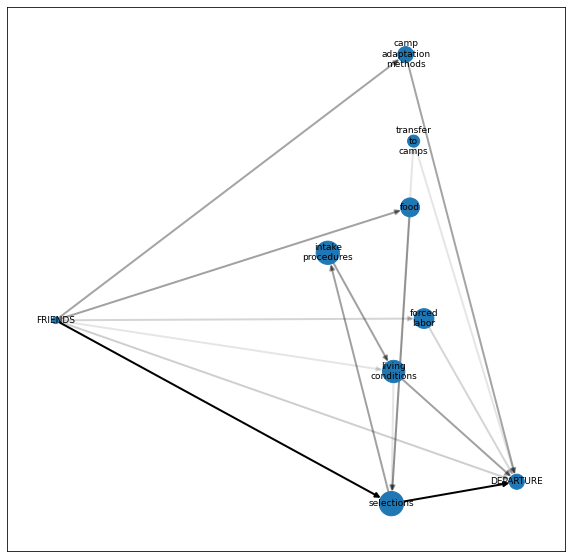

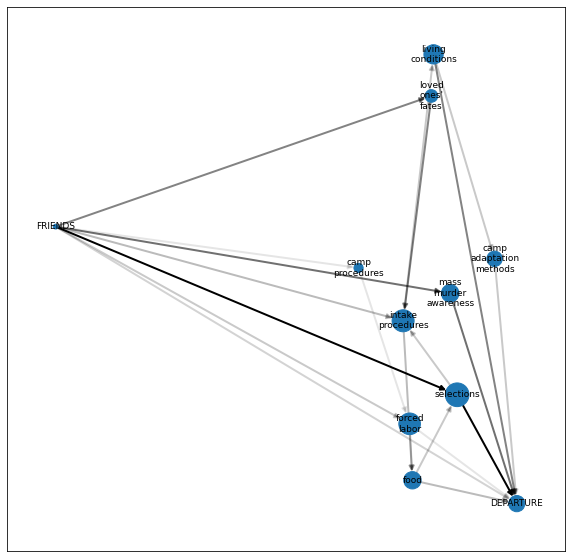

In [152]:
flux = 0.2
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

In [153]:
story_start = 'friends'
story_end = 'living conditions'
state_index = features_df.KeywordLabel.to_list()

In [154]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

In [155]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

Print the most important pathways for women

In [156]:
print_paths(flux_w,max_length=3)

friends-forced labor-living conditions:3.903566128746089


friends-food-living conditions:3.575888215169434


friends-living conditions:3.535931711450818


friends-prisoner tattoos (stills)-living conditions:2.9995560581020575


friends-Appell-living conditions:2.933889583471864


friends-intake procedures-living conditions:2.585149331303107


friends-camp adaptation methods-living conditions:2.280009307980909


friends-mass murder awareness-living conditions:1.6649879331202257


friends-extended family members-living conditions:1.2886988103433195


friends-clothing-living conditions:1.2345553498138122


friends-social relations-living conditions:1.2073482444329926


friends-Blockälteste-living conditions:1.1515074803959948


friends-loved ones' fates-living conditions:1.102484844087025


friends-psychological reactions-living conditions:0.922630988832773


friends-prisoner physical conditions-living conditions:0.725057012039865


friends-camp childbearing-living conditions:0.690531453

Print the most important pathways for men

In [157]:
print_paths(flux_m,max_length=3)

friends-mass murder awareness-living conditions:3.3727291522175755


friends-loved ones' fates-living conditions:2.8632100621512673


friends-intake procedures-living conditions:2.5435421834762892


friends-forced labor-living conditions:2.5262659962448746


friends-living conditions:2.198317704062199


friends-brutal treatment-living conditions:1.929094240499149


friends-camp adaptation methods-living conditions:1.8028839557871204


friends-prisoner tattoos (stills)-living conditions:1.5702357972322742


friends-housing conditions-living conditions:1.4470396120975573


friends-prisoner insignia-living conditions:0.8026590821994675


friends-kapos-living conditions:0.742775852801576


friends-populations-living conditions:0.7257883572130323


friends-Blockälteste-living conditions:0.6812075015893324


friends-Stubenälteste-living conditions:0.508897601962756


friends-quarantines-living conditions:0.389429247611085


friends-psychological reactions-living conditions:0.3813608032357208

Print similar pathways

In [158]:
print_similar_paths(flux_w,flux_m)

friends-kapos-living conditions
Women: 0.5475059790827778
Men: 0.742775852801576


friends-intake procedures-living conditions
Women: 2.585149331303107
Men: 2.5435421834762892


friends-social relations-selections-living conditions
Women: 1.0191723972205207
Men: 1.4840793318195646


friends-Stubenälteste-living conditions
Women: 0.13116509391448455
Men: 0.508897601962756


friends-psychological reactions-living conditions
Women: 0.922630988832773
Men: 0.38136080323572086


friends-loved ones' fates-living conditions
Women: 1.102484844087025
Men: 2.8632100621512673


friends-selections-intake procedures-living conditions
Women: 5.9742796517387475
Men: 6.270913871525296


friends-camp adaptation methods-living conditions
Women: 2.280009307980909
Men: 1.8028839557871204


friends-living conditions
Women: 3.535931711450818
Men: 2.198317704062199


friends-prisoner tattoos (stills)-living conditions
Women: 2.9995560581020575
Men: 1.5702357972322742


friends-mass murder awareness-living con

In [159]:
story_start = 'friends'
story_end = 'forced labor'
state_index = features_df.KeywordLabel.to_list()

In [160]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

In [161]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

Print the most important pathways for women

In [162]:
print_paths(flux_w,max_length=3)

friends-forced labor:7.431426222661654


friends-food-forced labor:3.557599215626481


friends-prisoner tattoos (stills)-forced labor:3.007360720216391


friends-Appell-forced labor:2.9174226091200346


friends-camp adaptation methods-forced labor:2.85736566175235


friends-aid giving-forced labor:1.5338897117404784


friends-social relations-forced labor:1.4380939592743103


friends-loved ones' fates-forced labor:1.094708931347743


friends-punishments-forced labor:0.8836258763287659


friends-beatings-forced labor:0.745997499971154


friends-orchestras-forced labor:0.7088032066329424


friends-mass murder awareness-forced labor:0.6334788092477569


friends-diseases-forced labor:0.6168556297955481


friends-environmental conditions-forced labor:0.5860582298022721


friends-prisoner physical conditions-forced labor:0.5389736466478288


friends-food additives-forced labor:0.5295003802574059


friends-kapos-forced labor:0.5044871781240889


friends-survival explanations-forced labor:0.46

Print the most important pathways for men

In [163]:
print_paths(flux_m,max_length=3)

friends-mass murder awareness-forced labor:3.3692119789902257


friends-forced labor:2.676809263862646


friends-loved ones' fates-forced labor:2.243211793959697


friends-camp procedures-forced labor:2.047909865819119


friends-social relations-forced labor:1.8284829247886576


friends-camp adaptation methods-forced labor:1.8018361984460023


friends-kapos-forced labor:1.570090620976529


friends-departure-forced labor:1.5433416913751594


friends-prisoner tattoos (stills)-forced labor:1.5130161979477685


friends-crematoria-forced labor:1.463045669669482


friends-housing conditions-forced labor:1.4441470756986288


friends-brutal treatment-forced labor:1.3691239148122667


friends-selections-forced labor:1.3264769675684172


friends-prisoner insignia-forced labor:1.2012981172575556


friends-quarantines-forced labor:1.1304910993491664


friends-children-forced labor:1.0835231533389944


friends-transfer to camps-forced labor:0.9861766846573143


friends-hiding and evasion-forced lab

In [164]:
print_similar_paths(flux_w,flux_m)

friends-diseases-forced labor
Women: 0.6168556297955481
Men: 0.6632736917241004


friends-Polish kapos-forced labor
Women: 0.1565517139187722
Men: 0.31027531703349903


friends-kapos-forced labor
Women: 0.5044871781240889
Men: 1.570090620976529


friends-psychological reactions-forced labor
Women: 0.3730245700104963
Men: 0.6589516136598417


friends-prisoner physical conditions-forced labor
Women: 0.5389736466478288
Men: 0.36223401405136985


friends-mass murder awareness-forced labor
Women: 0.6334788092477569
Men: 3.3692119789902257


friends-loved ones' fates-forced labor
Women: 1.094708931347743
Men: 2.243211793959697


friends-survival explanations-forced labor
Women: 0.46170469525356994
Men: 0.8428797490682748


friends-beatings-forced labor
Women: 0.745997499971154
Men: 0.24089571376873697


friends-selections-intake procedures-living conditions-forced labor
Women: 5.924385290857122
Men: 4.92590051027178


friends-aid giving-forced labor
Women: 1.5338897117404784
Men: 0.361329205

### Quantitative evdience 3

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


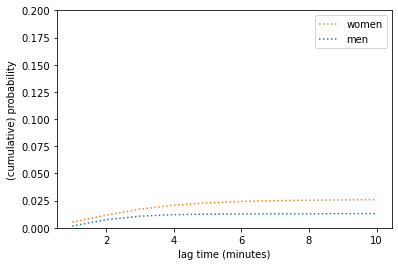

In [165]:
_msmlags = np.arange(1, 11)

topic_2 = ["friends"]
topic_1  = topic_map_forced_labor
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


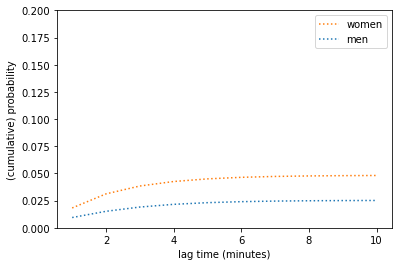

In [166]:
_msmlags = np.arange(1, 11)

topic_2 = ["friends"]
topic_1  = topic_map_living_conditions
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 7

## Qualitative description

If we look at all possible narrative pathways that can connect arrival to and departure from Birkenau, we can see that a significant amount of traffic is going through aid giving  and social bonds. Their significance can be understood if they are compared to Appel. The amount of traffic going through friendship  and food sharing is less significant. 

In case of women, more traffic is going through these nodes, with an exception of aid giving:

•    social bonds: 3.47 %

•    aid giving: 2.46 %

•    friendship: 0.85 $

•    food sharing: 0.35 %

In case of men, less traffic is going through these nodes:

•.	 social bonds: 2.46 %

•    aid giving: 2.6 %

•    friendship: 0.24 %

•    food sharing: 0.29 %

#### Total traffic going through them in the complete dataset (men and women):

In [167]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_complete = calculate_flux(data_set_1_complete,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
#flux_complete_dataset_2 = calculate_flux(data_set_2_complete,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Calculate the total traffic going through social bonds

In [168]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []
total_escapes = []

In [169]:
for i,element in enumerate(flux_complete):
    if 'social relations' in element.split('-'):
        total_social_bonds.append(flux_complete[element])
print(np.array(total_social_bonds).sum())

2.9361759723023977


Calculate the total traffic going through aid giving

In [170]:
for i,element in enumerate(flux_complete):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_complete[element])
print(np.array(total_aid_giving).sum())

2.671782784306458


Calculate the total traffic going through Appell

In [171]:
for i,element in enumerate(flux_complete):
    if 'Appell' in element.split('-'):
        total_appell.append(flux_complete[element])
print(np.array(total_appell).sum())

12.190907134349013


Calculate the total traffic going through escape

In [172]:
for i,element in enumerate(flux_complete):
    if 'escapes' in element.split('-'):
        total_escapes.append(flux_complete[element])
print(np.array(total_escapes).sum())

0.03714920335464153


Calculate the total traffic going through friendship

In [173]:
for i,element in enumerate(flux_complete):
    if 'friends' in element.split('-'):
        total_friends.append(flux_complete[element])
print(np.array(total_friends).sum())

0.537621861470134


Calculate the total traffic going through food sharing

In [174]:
for i,element in enumerate(flux_complete):
    if 'food sharing' in element.split('-'):
        total_food_sharing.append(flux_complete[element])
print(np.array(total_food_sharing).sum())

0.3785032595815103


#### Total traffic going through them in the dataset of women

In [175]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
#flux_w_dataset_2 = calculate_flux(data_set_2_w,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


In [176]:
len(flux_w)

591

In [177]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []

Calculate the total traffic going through social bonds

In [178]:
for i,element in enumerate(flux_w):
    if 'social relations' in element.split('-'):
        total_social_bonds.append(flux_w[element])
print(np.array(total_social_bonds).sum())

3.474288919133101


Calculate the total traffic going through aid giving

In [179]:
for i,element in enumerate(flux_w):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_w[element])
print(np.array(total_aid_giving).sum())

2.464212164517551


Calculate the total traffic going through friendship

In [180]:
for i,element in enumerate(flux_w):
    if 'friends' in element.split('-'):
        total_friends.append(flux_w[element])
print(np.array(total_friends).sum())

0.8589557864629831


Calculate the total traffic going through food sharing

In [181]:
for i,element in enumerate(flux_w):
    if 'food sharing' in element.split('-'):
        total_food_sharing.append(flux_w[element])
        #print (element)
        #print (flux_w[element])
print(np.array(total_food_sharing).sum())

0.35292251677209796


#### Total traffic going through them in the dataset of men

In [182]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
#flux_m_dataset_2 = calculate_flux(data_set_2_m,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


In [183]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []



Calculate the total traffic going through social bonds

In [184]:
for i,element in enumerate(flux_m):
    if 'social relations' in element.split('-'):
        total_social_bonds.append(flux_m[element])
print(np.array(total_social_bonds).sum())

2.463033285762974


Calculate the total traffic going through aid giving

In [185]:
for i,element in enumerate(flux_m):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_m[element])
print(np.array(total_aid_giving).sum())

2.5828007435169775


Calculate the total traffic going through friendship

In [186]:
for i,element in enumerate(flux_m):
    if 'friends' in element.split('-'):
        total_friends.append(flux_m[element])
print(np.array(total_friends).sum())

0.2462599967198605


Calculate the total traffic going through food sharing

In [187]:
total_food_sharing = []

In [188]:
for i,element in enumerate(flux_m):
    if 'food sharing' in element.split('-'):
        #print (element)
        #print (flux_m[element])
        total_food_sharing.append(flux_m[element])
print(np.array(total_food_sharing).sum())

0.2926940919542089


## Observation 8

### Qualitative Description

In testimonies of women there are important narrative pathways that lead to the discussion of survival explanations and involve social bonds (friends and social relations) as states preceding survival explanations; in testimonies of men such paths have significantly less traffic (the ratio is more than 3 times for women)

At the same time, in testimonies of men, between aid giving and survival explanation there is slightly more traffic (ratio is 1.6 times).

The study of direct link has similar results:

aid giving-survival explanations <br/>
Women: 2.6696661754080866 <br/>
Men: 3.8067494674128137 <br/>

But in case of women social relations and friends are important transitionary topics:

aid giving-social relations-survival explanations:1.3752851611513381 <br/>
aid giving-friends-survival explanations:0.8100798985654745 <br/>

The amount of direct traffic between social relations and survival explanations is much larger for women:

social relations-survival explanations <br/>
Women: 3.3426904751901763 <br/>
Men: 0.6392835020909489 <br/>


With friends, there is slightly more traffic in case of men:

friends-survival explanations <br/>
Women: 1.9655525123995026 <br/>
Men: 2.17582398231009 <br/>



### Quantitative evidence 1

In [189]:
story_start = 'arrival'
story_end = 'survival explanations'

In [190]:
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Find social bonds preceding survivor explanation in women narratives

In [191]:
result = []
for path in flux_w:
    if len(path.split('-social relations-survival explanations'))>1 or len(path.split('-friends-survival explanations'))>1:
        print (path)
        print (flux_w[path])
        result.append(flux_w[path])
        print ('\n')
print (np.array(result).sum())

arrival-intake procedures-housing conditions-social relations-survival explanations
2.2547144300318847


arrival-intake procedures-living conditions-friends-survival explanations
0.9322997760921699


arrival-shoes-housing conditions-Appell-selections-intake procedures-living conditions-social relations-survival explanations
0.154720068194285


arrival-emotions-psychological distress prevention-living conditions-social relations-survival explanations
0.03994543491265816


arrival-property seizure-prisoner tattoos (stills)-living conditions-selections-intake procedures-Appell-food-social relations-survival explanations
0.005337564867344216


arrival-SS/SD personnel-intake procedures-social relations-survival explanations
0.0003647416136996868


arrival-food acquisition-selections-intake procedures-social relations-survival explanations
8.969452305277983e-05


3.3874717102350944


Print the total amount of traffic going through these nodes

In [192]:
print (np.array(result).sum())

3.3874717102350944


Find aid giving in women narratives

In [193]:
result = []
for path in flux_w:
    if len(path.split('-aid giving-survival explanations'))>1:
        print (path)
        print (flux_w[path])
        result.append(flux_w[path])
        print ('\n')
print (np.array(result).sum())

arrival-intake procedures-prisoner tattoos (stills)-forced labor-aid giving-survival explanations
2.0329563995353395


2.0329563995353395


Print the total amount of traffic going through these nodes

In [194]:
print (np.array(result).sum())

2.0329563995353395


Find social bonds preceding survivor explanation in men narratives

In [195]:
result = []
for path in flux_m:
    if len(path.split('-social relations-survival explanations'))>1 or len(path.split('-friends-survival explanations'))>1:
        print (path)
        print (flux_m[path])
        result.append(flux_m[path])
        print ('\n')
print (np.array(result).sum())

arrival-loved ones' fates-intake procedures-food-selections-medical experiments-post-conflict medical problems-friends-survival explanations
0.6215828651848468


arrival-camp adaptation methods-departure-freight trains-selections-intake procedures-housing conditions-Appell-social relations-survival explanations
0.31219525142050775


arrival-interviewee memory-intake procedures-prisoner tattoos-forced labor-beatings-social relations-survival explanations
0.09381584482154019


1.0275939614268947


Print the total amount of traffic going through these nodes

In [196]:
print (np.array(result).sum())

1.0275939614268947


Find aid giving preceding survivor explanation in women narratives

In [197]:
result = []
for path in flux_m:
    if len(path.split('-aid giving-survival explanations'))>1:
        print (path)
        print (flux_m[path])
        result.append(flux_m[path])
        print ('\n')
print (np.array(result).sum())

arrival-selections-intake procedures-living conditions-camp adaptation methods-aid giving-survival explanations
1.9747229803809798


arrival-kapos-selections-intake procedures-prisoner tattoos-forced labor-aid giving-survival explanations
0.6391633927462612


arrival-Soviet armed forces-liberation-related aid giving-post-conflict medical problems-mass murder awareness-departure-freight trains-transfer conditions-intake procedures-housing conditions-social relations-aid giving-survival explanations
0.003175935867287071


2.617062308994528


Print the total amount of traffic going through these nodes

In [198]:
print (np.array(result).sum())

2.617062308994528


### Quantitative evidence 2

In [199]:
story_start = 'aid giving'
story_end = 'survival explanations'
state_index = features_df.KeywordLabel.to_list()

In [200]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

In [201]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

In [202]:
print_paths(flux_w,max_length=3)

aid giving-selections-survival explanations:5.555661518054932


aid giving-forced labor-survival explanations:3.556113971830398


aid giving-camp adaptation methods-survival explanations:3.1187219544134397


aid giving-survival explanations:2.6696661754080773


aid giving-departure-survival explanations:2.090395792520966


aid giving-Mengele, Josef-survival explanations:2.059875729950495


aid giving-social relations-survival explanations:1.3752851611513377


aid giving-loved ones' renewed contacts-survival explanations:0.8985762248585092


aid giving-Jewish prisoners-survival explanations:0.8494919864268912


aid giving-friends-survival explanations:0.8100798985654747


aid giving-medical care-survival explanations:0.6816946621056543


aid giving-children-survival explanations:0.5509103854822197


aid giving-preferential treatment-survival explanations:0.5365026647746819


aid giving-camp childbearing-survival explanations:0.4638039086758713


aid giving-deaths-survival explanations:0

In [203]:
print_paths(flux_m,max_length=3)

aid giving-selections-survival explanations:4.9666939897010085


aid giving-survival explanations:3.8067494674128266


aid giving-forced labor-survival explanations:3.5309081374708833


aid giving-food-survival explanations:1.5241451647641455


aid giving-extended family members-survival explanations:0.847425663955283


aid giving-medical care-survival explanations:0.6026391275098817


aid giving-German camp personnel-survival explanations:0.5320086499151766


aid giving-killings-survival explanations:0.4120213988677099


aid giving-warnings-survival explanations:0.2875527233483409


aid giving-Czechoslovak prisoners-survival explanations:0.19958768604328828


aid giving-hiding (aid giving)-survival explanations:0.13009000075996474


aid giving-deportation procedures-survival explanations:0.055873450434574104


aid giving-loved ones' separations-survival explanations:0.023870218633866576




In [204]:
print_similar_paths(flux_w,flux_m)

aid giving-warnings-survival explanations
Women: 0.2955083816536192
Men: 0.2875527233483409


aid giving-forced labor-survival explanations
Women: 3.556113971830398
Men: 3.5309081374708833


aid giving-selections-survival explanations
Women: 5.555661518054932
Men: 4.9666939897010085


aid giving-medical care-survival explanations
Women: 0.6816946621056543
Men: 0.6026391275098817


aid giving-survival explanations
Women: 2.6696661754080773
Men: 3.8067494674128266




In [205]:
story_start = 'social relations'
story_end = 'survival explanations'
state_index = features_df.KeywordLabel.to_list()
flux = 0.3

In [206]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [207]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [208]:
print_paths(flux_w)

social relations-selections-survival explanations:5.520460150007228


social relations-food-selections-intake procedures-living conditions-survival explanations:4.105930691699752


social relations-forced labor-survival explanations:3.5436580421198


social relations-survival explanations:3.3426904751901736


social relations-living conditions-selections-intake procedures-mass murder awareness-survival explanations:3.1478961965268324


social relations-camp adaptation methods-survival explanations:3.1074099793820515


social relations-aid giving-selections-intake procedures-housing conditions-Appell-survival explanations:2.6890231491620376


social relations-departure-freight trains-intake procedures-family interactions-survival explanations:2.4196107830014357


social relations-Appell-selections-departure-survival explanations:2.0882242943898897


social relations-transfer to camps-transfer conditions-intake procedures-living conditions-selections-Mengele, Josef-survival explanations:

In [209]:
print_paths(flux_m)

social relations-selections-survival explanations:4.992832245668062


social relations-food-selections-departure-survival explanations:3.7556812502736596


social relations-aid giving-selections-loved ones' fates-survival explanations:3.5703181692432295


social relations-forced labor-survival explanations:3.5605200965601704


social relations-living conditions-survival explanations:3.075170821185692


social relations-camp adaptation methods-departure-transfer conditions-survival explanations:2.6463495916668127


social relations-mass murder awareness-forced labor-food-departure-transfer to camps-survival explanations:2.451003761960946


social relations-forced labor-politico-military event awareness-departure-transfer conditions-German soldiers-selections-intake procedures-food-hunger-survival explanations:1.6580636070539778


social relations-transfer to camps-transfer conditions-intake procedures-living conditions-food-survival explanations:1.5453627777359218


social relations-pri

In [210]:
print_similar_paths(flux_w,flux_m)

social relations-forced labor-survival explanations
Women: 3.5436580421198
Men: 3.5605200965601704


social relations-selections-survival explanations
Women: 5.520460150007228
Men: 4.992832245668062




In [211]:
story_start = 'friends'
story_end = 'survival explanations'
state_index = features_df.KeywordLabel.to_list()

In [212]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

In [213]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

In [214]:
print_paths(flux_w,max_length=3)

friends-selections-survival explanations:5.51549248286193


friends-camp adaptation methods-survival explanations:3.1079630886816485


friends-survival explanations:1.965552512399507


friends-prisoner tattoos (stills)-survival explanations:0.28709883959899113


friends-female camp guards-survival explanations:0.08040650787750926


friends-frostbite-survival explanations:0.027245068210518218




In [215]:
print_paths(flux_m,max_length=3)

friends-selections-survival explanations:4.90635508014593


friends-loved ones' fates-survival explanations:4.24603075298023


friends-survival explanations:2.1758239823101055


friends-kapos-survival explanations:1.2962659771890093


friends-prisoner identification numbers-survival explanations:1.253079290926383


friends-German camp personnel-survival explanations:0.14759270557261261




In [216]:
print_similar_paths(flux_w,flux_m)

friends-survival explanations
Women: 1.965552512399507
Men: 2.1758239823101055


friends-selections-survival explanations
Women: 5.51549248286193
Men: 4.90635508014593




## Visualize


Notice that social bonds are "missing" from the plot showing men

8 labels to show
9 labels to show


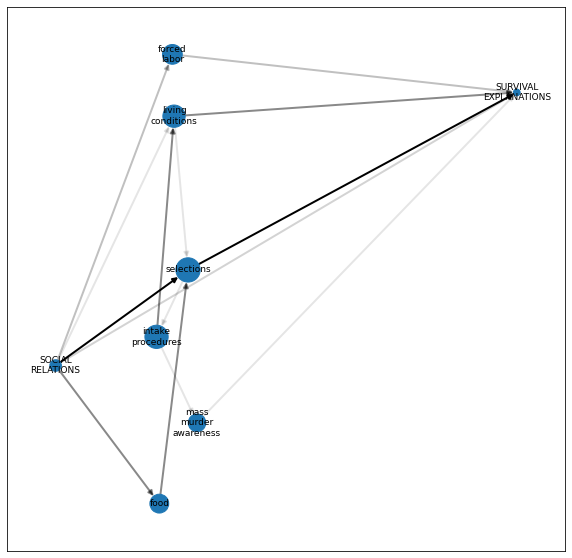

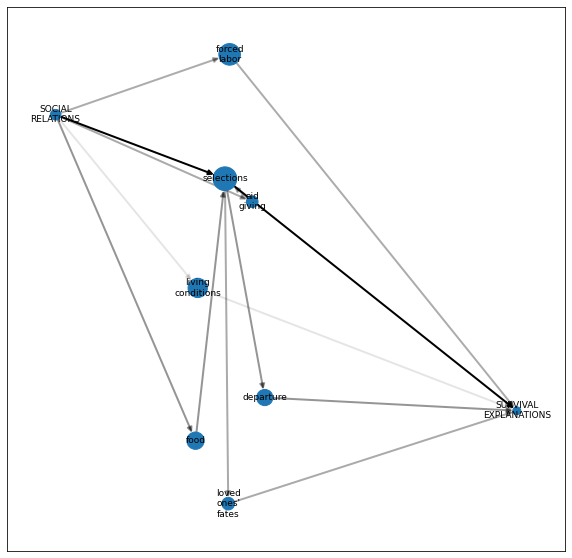

In [217]:
story_start = 'social relations'
story_end = 'survival explanations'
flux = 0.17
res=visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evdience 3

The probability that survival explanations follow friends and social relations is higher for women.

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


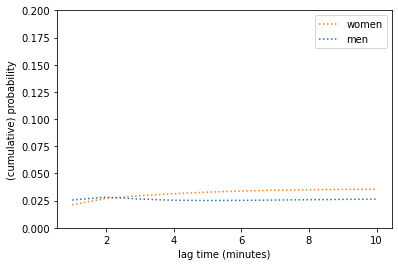

In [218]:
_msmlags = np.arange(1, 11)

topic_1 = ["social relations","friends"]
topic_2  = ['survival explanations','survival']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)
plt.savefig('Figure_4_social_relations_friends_following_survival_explanations.png')

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


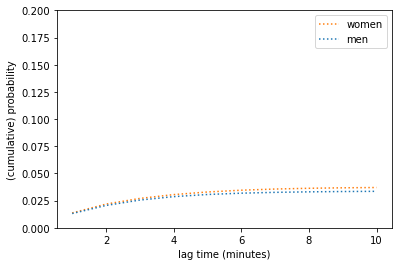

In [219]:
_msmlags = np.arange(1, 11)

topic_1 = ["aid giving","food sharing"]
topic_2  = ['survival explanations','survival']
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)
plt.savefig('Figure_4_aid_giving_food sharing_following_survival_explanations.png')

## Observation 9

### Qualitative description

The moment when one particularly needed the help of others was the selection, when the ill and those who were unable to work were selected to be sent to gas chambers. In testimonies we can often read that victims helped each other in these moments (for instance by hiding or holding the ill); yet victims attribute their survival of selections to the help of their peers and friends. This narrative frame corresponds to the following narrative pathways:
- selections-social relations-survival explanations <br/>
- selections-friends-survival explanations <br/>
- selections-aid giving-survival explanations <br/>

These narrative pathways are more significant in testimonies of women than men.

In case of women:

selections-aid giving-survival explanations:1.372566897382252 <br/>
selections-social relations-survival explanations:0.8517907825853956 <br/>
selections-friends-survival explanations:0.4084233290441179 <br/>

In case of men:

selections-aid giving-survival explanations:0.9130792244020753 <br/>
selections-friends-survival explanations: 0.22597524390714183 <br/>
no path with social relations <br/>


Men and women are equally likely to connect selection with survival explanations:

selections-survival explanations <br/>
Women: 5.995184312276154 <br/>
Men: 5.573167275281716 <br/>

Similarly, another moment when one needed the help of others was the Appel, again women discuss Appel survivor explanations with friends and social relations as transitionary topics:

Appell-social relations-survival explanations:1.2750393765030372 <br/>
Appell-friends-survival explanations:0.35100749020630817 <br/>


### Quantitative evidence 1

In [220]:
story_start = 'selections'
story_end = 'survival explanations'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [221]:
print_paths(flux_w,max_length=4)

selections-survival explanations:5.995184312276153


selections-intake procedures-living conditions-survival explanations:4.1438570468772475


selections-mass murder awareness-survival explanations:3.1734793880728236


selections-camp adaptation methods-survival explanations:3.128705235997652


selections-forced labor-survival explanations:2.4896536090004635


selections-departure-survival explanations:2.0950944274709045


selections-Mengele, Josef-survival explanations:2.0696456754813846


selections-transfer to camps-survival explanations:1.8855884250056707


selections-family interactions-survival explanations:1.677215179547712


selections-aid giving-survival explanations:1.372566897382251


selections-extended family members-survival explanations:1.0837883916225906


selections-intake procedures-prisoner tattoos-survival explanations:1.054539703365661


selections-intake procedures-Blockälteste-survival explanations:0.9894864930968335


selections-social relations-survival explana

In [222]:
print_paths(flux_m,max_length=3)

selections-survival explanations:5.573167275281716


selections-loved ones' fates-survival explanations:3.0820476962530226


selections-forced labor-survival explanations:2.899204387601934


selections-extended family members-survival explanations:1.5864538159305852


selections-Mengele, Josef-survival explanations:1.2831720816827177


selections-SS/SD personnel-survival explanations:0.9814426515449083


selections-hiding and evasion-survival explanations:0.9584694205890589


selections-aid giving-survival explanations:0.9130792244020752


selections-intake procedures-survival explanations:0.9086238847622737


selections-family interactions-survival explanations:0.8925868852297006


selections-Jewish prisoners-survival explanations:0.6800692708204368


selections-mass murder awareness-survival explanations:0.6641209798968398


selections-killings-survival explanations:0.6226869782704496


selections-loved ones' final contacts-survival explanations:0.5931306770141005


selections-Roma p

In [223]:
print_similar_paths(flux_w,flux_m)

selections-intake procedures-prisoner tattoos-survival explanations
Women: 1.054539703365661
Men: 1.1050606297533427


selections-arrival-survival explanations
Women: 0.3900277643294809
Men: 0.28008408165672155


selections-Polish prisoners-survival explanations
Women: 0.09886660942048683
Men: 0.22377999435654652


selections-aid giving-survival explanations
Women: 1.372566897382251
Men: 0.9130792244020752


selections-intake procedures-housing conditions-Appell-survival explanations
Women: 2.7010425799106126
Men: 0.7614477769898288


selections-preferential treatment-survival explanations
Women: 0.4317278064305954
Men: 0.3179211122239471


selections-hiding and evasion-survival explanations
Women: 0.7610267721777721
Men: 0.9584694205890589


selections-intake procedures-survival explanations
Women: 0.7706272998287322
Men: 0.9086238847622737


selections-children-survival explanations
Women: 0.3468675851530324
Men: 0.3323688023774206


selections-beatings-survival explanations
Women: 0

In [224]:
story_start = 'Appell'
story_end = 'survival explanations'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [225]:
print_paths(flux_w,max_length=4)

Appell-selections-survival explanations:5.550793726117129


Appell-living conditions-survival explanations:4.143687118540695


Appell-forced labor-survival explanations:3.5678674690309617


Appell-survival explanations:3.180359978960977


Appell-mass murder awareness-survival explanations:3.1671226155644367


Appell-camp adaptation methods-survival explanations:2.684855591717338


Appell-food-survival explanations:1.2965955428301004


Appell-social relations-survival explanations:1.275039376503037


Appell-family interactions-survival explanations:1.1997322331453655


Appell-Blockälteste-survival explanations:1.1058507994984923


Appell-food-sanitary conditions-survival explanations:0.8394054345861947


Appell-food-prisoner physical conditions-survival explanations:0.8232997503023615


Appell-diseases-survival explanations:0.7617818064153397


Appell-SS/SD personnel-survival explanations:0.7614236952964454


Appell-selections-intake procedures-survival explanations:0.7509360331634629



In [226]:
print_paths(flux_m,max_length=3)

Appell-selections-survival explanations:4.984116305491254


Appell-forced labor-survival explanations:3.561265434386709


Appell-living conditions-survival explanations:3.0804072657671986


Appell-food-survival explanations:1.56677406649087


Appell-prisoner tattoos (stills)-survival explanations:1.407198728805402


Appell-aid giving-survival explanations:1.2523138131361171


Appell-psychological reactions-survival explanations:1.2495639210251936


Appell-killings-survival explanations:1.1947688082919816


Appell-extended family members-survival explanations:1.1466158652785858


Appell-family interactions-survival explanations:1.0864410146057302


Appell-survival explanations:1.0684693800431044


Appell-criminal prisoners-survival explanations:0.6868992835173685


Appell-hangings-survival explanations:0.3691620844812716


Appell-Czechoslovak prisoners-survival explanations:0.20144814244452297




In [227]:
print_similar_paths(flux_w,flux_m)

Appell-killings-survival explanations
Women: 0.3181653479772207
Men: 1.1947688082919816


Appell-living conditions-survival explanations
Women: 4.143687118540695
Men: 3.0804072657671986


Appell-survival explanations
Women: 3.180359978960977
Men: 1.0684693800431044


Appell-family interactions-survival explanations
Women: 1.1997322331453655
Men: 1.0864410146057302


Appell-forced labor-survival explanations
Women: 3.5678674690309617
Men: 3.561265434386709


Appell-food-survival explanations
Women: 1.2965955428301004
Men: 1.56677406649087


Appell-selections-survival explanations
Women: 5.550793726117129
Men: 4.984116305491254


Appell-food-selections-departure-survival explanations
Women: 2.087667690387606
Men: 3.7741690955312084




### Visualization

9 labels to show
10 labels to show


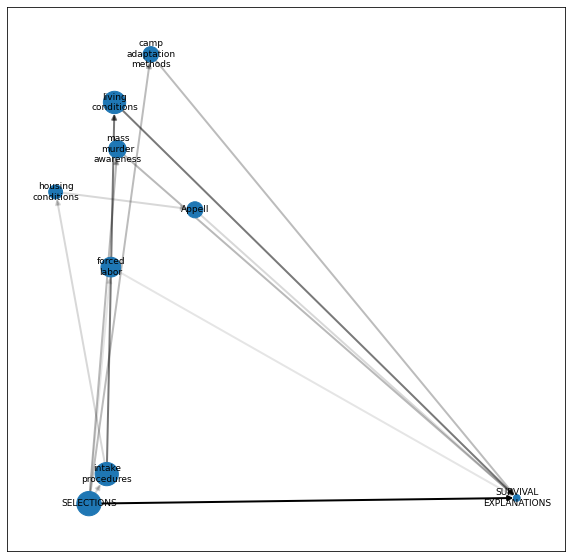

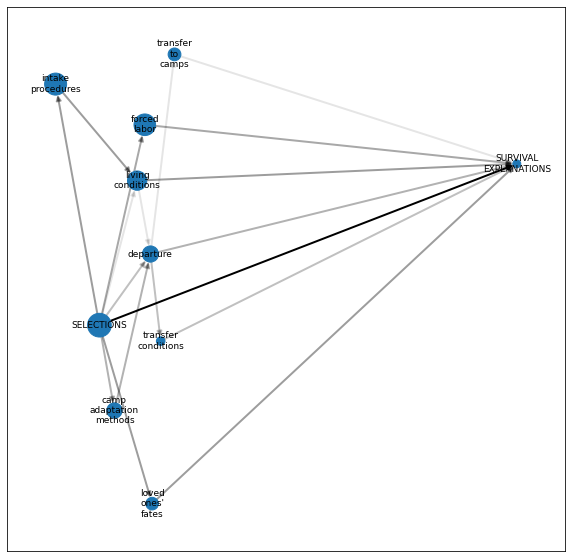

In [228]:
flux = 0.2
res = visualize_most_important_paths(data_set_1_w,flux,features_df,['selections'],story_end,None)
res=visualize_most_important_paths(data_set_1_m,flux,features_df,['selections'],story_end,None)

## Observation 10

### Qualitative description

Social relations and aid giving are closely connected in narratives of both men and women; (slightly more connected for men). For women, the most important transitionary topic is living conditions and selection, for men it is forced labor.

social relations-forced labor-aid giving <br/>
Women: 2.8948768437334533 <br/>
Men: 6.7009466811388885 <br/>


social relations-living conditions-aid giving <br/>
Women: 3.2443759794384 <br/>
Men: 1.9733942618306775 <br/>


### Quantitative evidence

In [229]:
flux = 1
story_start = 'social relations'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [230]:
print_paths(flux_w,max_length=3)

social relations-selections-aid giving:5.371886618798135


social relations-aid giving:5.19734773223736


social relations-living conditions-aid giving:3.2443759794383924


social relations-camp adaptation methods-aid giving:3.228444349051867


social relations-forced labor-aid giving:2.894876843733439


social relations-mass murder awareness-aid giving:2.846868521229424


social relations-family interactions-aid giving:1.9746099158818724


social relations-prisoner physical conditions-aid giving:1.3950415654757367


social relations-extended family members-aid giving:1.365473937536604


social relations-camp childbearing-aid giving:0.8197082468610568


social relations-SS/SD personnel-aid giving:0.7728594497769098


social relations-sustenance provision-aid giving:0.7668783272809397


social relations-beatings-aid giving:0.7205914354339906


social relations-prisoner external contact-aid giving:0.6897248671337303


social relations-diseases-aid giving:0.6700584901007358


social relat

In [231]:
print_paths(flux_m,max_length=3)

social relations-aid giving:7.363992537011065


social relations-forced labor-aid giving:6.700946681138882


social relations-camp adaptation methods-aid giving:4.215922136512685


social relations-selections-aid giving:3.3505253855270873


social relations-mass murder awareness-aid giving:2.398991864027979


social relations-living conditions-aid giving:1.9733942618306795


social relations-family interactions-aid giving:1.0487253736983904


social relations-Jewish prisoners-aid giving:0.8594477118009045


social relations-extended family members-aid giving:0.7856923088765465


social relations-sustenance provision-aid giving:0.7172271269519228


social relations-Jewish prisoner functionaries-aid giving:0.6403273891540905


social relations-Polish prisoners-aid giving:0.6178593018254684


social relations-cultural activities-aid giving:0.4576498552933207


social relations-Czechoslovak prisoners-aid giving:0.34009968010332986


social relations-female prisoners-aid giving:0.3250660881

In [232]:
print_similar_paths(flux_w,flux_m)

social relations-family interactions-aid giving
Women: 1.9746099158818724
Men: 1.0487253736983904


social relations-living conditions-aid giving
Women: 3.2443759794383924
Men: 1.9733942618306795


social relations-sustenance provision-aid giving
Women: 0.7668783272809397
Men: 0.7172271269519228


social relations-aid giving
Women: 5.19734773223736
Men: 7.363992537011065


social relations-mass murder awareness-aid giving
Women: 2.846868521229424
Men: 2.398991864027979


social relations-female prisoners-aid giving
Women: 0.546608433942455
Men: 0.3250660881686331


social relations-Jewish prisoners-aid giving
Women: 0.632394725607058
Men: 0.8594477118009045


social relations-forced labor-aid giving
Women: 2.894876843733439
Men: 6.700946681138882


social relations-Polish prisoners-aid giving
Women: 0.5155287798810982
Men: 0.6178593018254684


social relations-extended family members-aid giving
Women: 1.365473937536604
Men: 0.7856923088765465


social relations-camp adaptation methods-

### Visualize

8 labels to show
5 labels to show


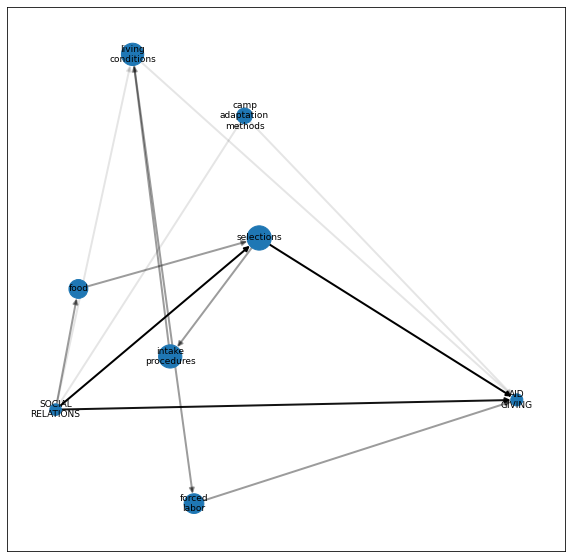

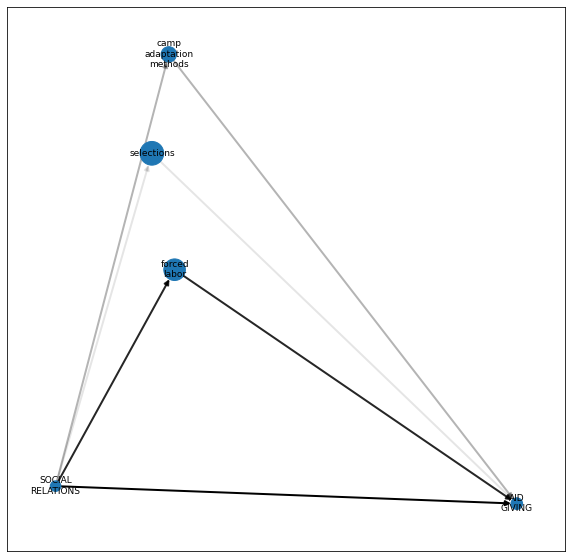

In [233]:
story_start = ['social relations']
story_end = ['aid giving']
res = visualize_most_important_paths(data_set_1_w,0.2,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m,0.2,features_df,story_start,story_end,None)

## Observation 11

### Qualitative description

Friendship and aid giving are closely connected in narratives of women and they are not closely connected in narratives of men.

friends-selections-aid giving
Women: 5.427121616259672
Men: 0.11639422393786059


friends-aid giving
Women: 1.9789089838040406
Men: 0.4285773765946193


### Quantitative evidence

In [234]:
flux = 1
story_start = 'friends'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [235]:
print_paths(flux_w,max_length=3)

friends-forced labor-aid giving:6.707407115489011


friends-selections-aid giving:5.427121616259669


friends-camp adaptation methods-aid giving:3.3758016317749


friends-social relations-aid giving:2.525227392047558


friends-Appell-aid giving:2.002246399853754


friends-aid giving:1.9789089838040401


friends-intake procedures-aid giving:1.9266493765344035


friends-extended family members-aid giving:1.38272831657759


friends-camp childbearing-aid giving:0.7369435813513182


friends-beatings-aid giving:0.731001536955183


friends-Jewish prisoners-aid giving:0.4801758972054211


friends-corpses-aid giving:0.3952491179279302


friends-transfer preparations-aid giving:0.3118948130674442


friends-Sonderkommando prisoners-aid giving:0.16107054500816873


friends-physical hygiene maintenance-aid giving:0.14439013142511223


friends-malnutrition-aid giving:0.10307125466607793


friends-ghetto personnel-aid giving:0.07467964945949707




In [236]:
print_paths(flux_m,max_length=3)

friends-intake procedures-aid giving:2.414530380359902


friends-social relations-aid giving:2.0629216107915798


friends-Blockälteste-aid giving:1.0560553463423092


friends-survival explanations-aid giving:1.0227456730918592


friends-showers-aid giving:0.6051653708574977


friends-aid giving:0.42857737659462103


friends-Czechoslovak prisoners-aid giving:0.36493065482665177


friends-smuggling-aid giving:0.20074617560320393


friends-selections-aid giving:0.11639422393788151


friends-quarantines-aid giving:0.11473347245116614


friends-German camp personnel-aid giving:0.11320345605612239




In [237]:
print_similar_paths(flux_w,flux_m,max_length=3)

friends-intake procedures-aid giving
Women: 1.9266493765344035
Men: 2.414530380359902


friends-selections-aid giving
Women: 5.427121616259669
Men: 0.11639422393788151


friends-social relations-aid giving
Women: 2.525227392047558
Men: 2.0629216107915798


friends-aid giving
Women: 1.9789089838040401
Men: 0.42857737659462103




### Visualize

5 labels to show
14 labels to show


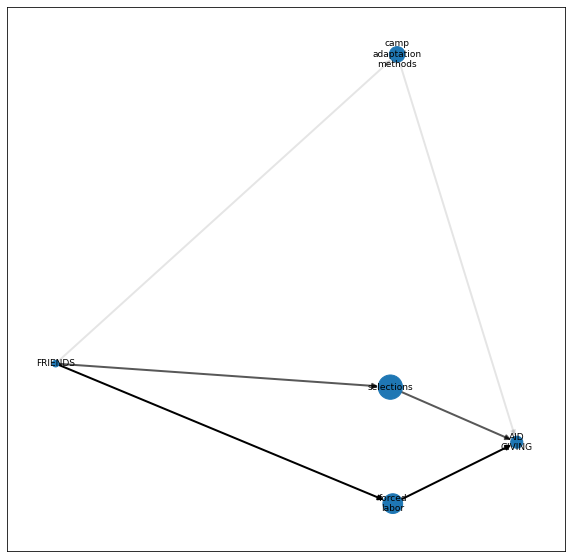

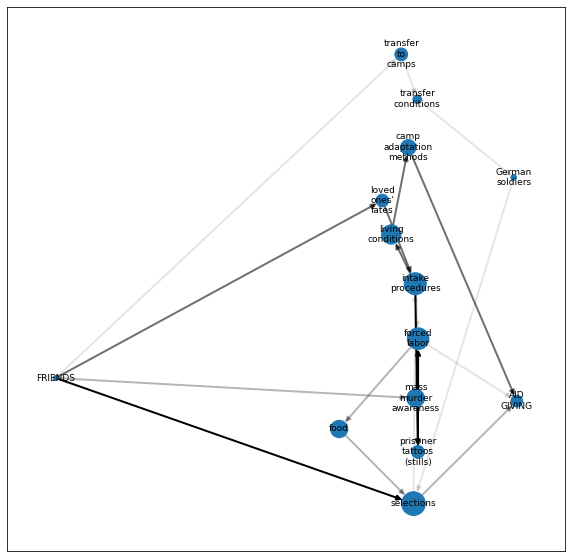

In [238]:
flux = 0.15
story_start = ['friends']
story_end = ['aid giving']
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

The probability that aid giving follow friends and social relations is higher for women.

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


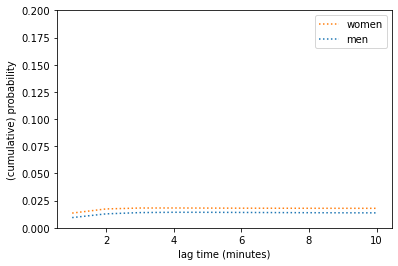

In [239]:
_msmlags = np.arange(1, 11)

topic_1 = ["friends","social relations"]
topic_2= ['aid giving']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 13

### Qualitative description

In narratives of those men and women who did not work, friendship and survival explanations are more connected for women

### Quantitative evidencw

In [240]:
flux = 0.6
story_start = 'friends'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



In [241]:
print_similar_paths(flux_w,flux_m)

friends-survival explanations
Women: 3.8206118361284838
Men: 2.9244027671645783




10 labels to show
10 labels to show


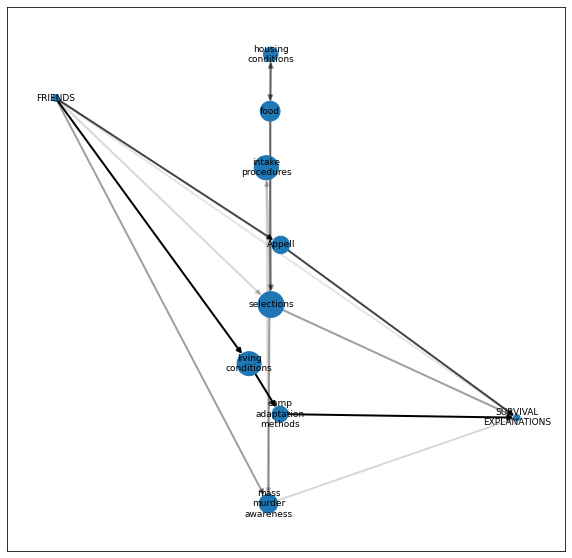

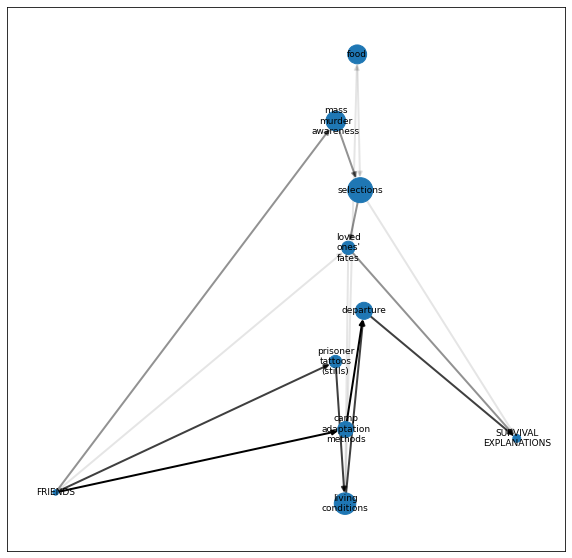

In [242]:

story_start = ['friends']
story_end = ['survival explanations']
flux = 0.2
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

The probability that aid giving follow friends and social relations is higher for women.

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


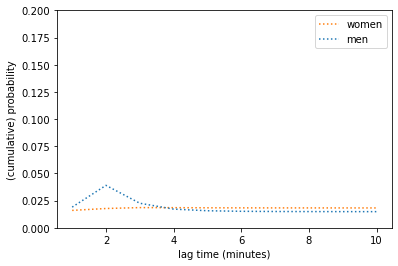

In [243]:
_msmlags = np.arange(1, 11)

topic_1 = ["friends","social relations"]
topic_2= ['survival explanations']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 14 A

### Qualitative description

In narratives of those men and women who did not work, social relations and living conditions are much more connected for women:

living conditions - social relations

For women 9.9% of total traffic is going through this path, whereas for men, it is 5.8%.

The following transitionary topics are present both in testimonies of women and men but with different weights:

living conditions-aid giving-social relations <br/>
Women: 1.3274897627391509 <br/>
Men: 0.6744181635044657 <br/>

living conditions-friends-social relations <br/>
Women: 0.8305450841970277 <br/>
Men: 0.522043120093434 <br/>

living conditions-Blockälteste-social relations <br/>
Women: 1.151697967923542 <br/>
Men: 0.751131993867747 <br/>

living conditions-hunger-social relations <br/>
Women: 0.3749064709578037 <br/>
Men: 1.02338128352873 <br/>

### Quantitative evidence

In [244]:
flux = 0.6
story_start = 'living conditions'
story_end = 'social relations'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



In [245]:
print_similar_paths(flux_w,flux_m)

living conditions-brutal treatment-social relations
Women: 0.9443085408790057
Men: 0.8145196714096123


living conditions-food-social relations
Women: 6.056736616991863
Men: 7.194168861442799


living conditions-camp adaptation methods-social relations
Women: 1.7532342673393668
Men: 3.9303172383952707


living conditions-family interactions-social relations
Women: 1.8597086347922533
Men: 0.7360261863081244


living conditions-social relations
Women: 9.908706958389011
Men: 5.890004275849444


living conditions-selections-intake procedures-housing conditions-social relations
Women: 3.5439527346500816
Men: 4.050389219256563


living conditions-aid giving-social relations
Women: 1.3274897627391522
Men: 0.6744181635044664


living conditions-mass murder awareness-social relations
Women: 3.1187452875539643
Men: 2.1539341123699143


living conditions-Blockälteste-social relations
Women: 1.151697967923542
Men: 0.751131993867747




6 labels to show
7 labels to show


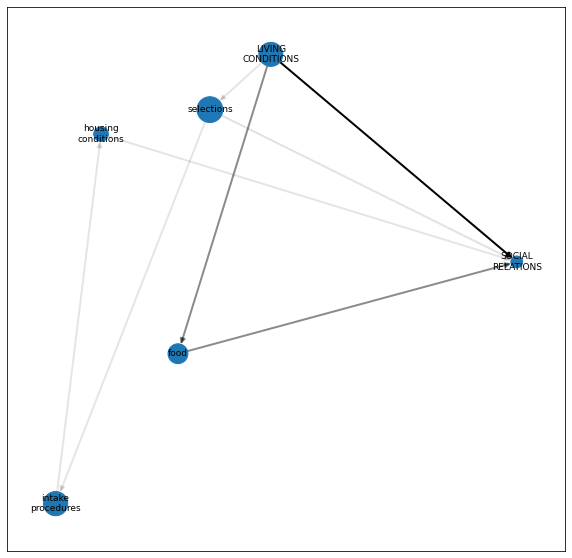

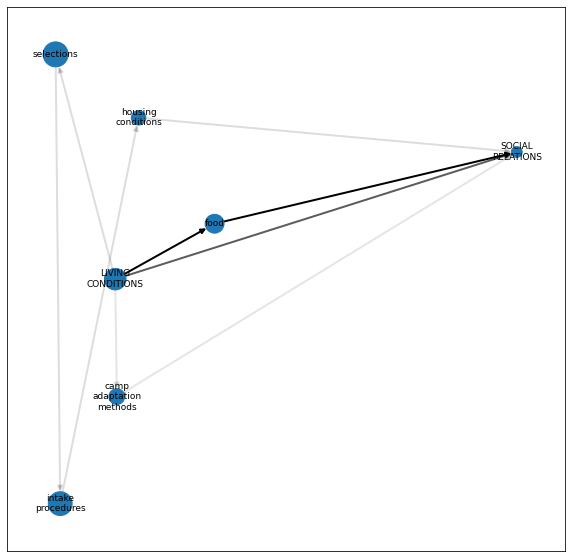

In [246]:

story_start = ['living conditions']
story_end = ['social relations']
flux = 0.2
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

The probability that friends and social relations follow living conditions is higher for women who did not work.

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


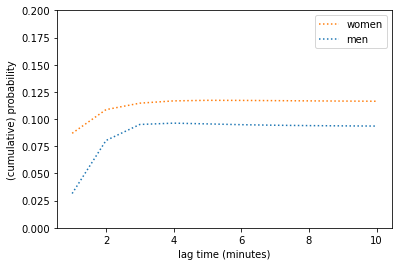

In [247]:
_msmlags = np.arange(1, 11)

topic_2 = ["friends","social relations"]
topic_1= ['living conditions']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 14

### Qualitative description

In narratives of those men and women who did not work, friendship and living conditions are much more connected for women:

friends-living conditions

For women 6.7% of total traffic is going through this path, whereas for men, it is 1.5%.

In case of women, the main transitionary topics include:


friends-aid giving-living conditions:1.1352997404787295

friends-Blockälteste-living conditions:0.9866599269050341

friends-food-living conditions:2.8081658495238724


### Quantitative evidence

In [248]:
flux = 1
story_start = 'friends'
story_end = 'living conditions'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [249]:
print_paths(flux_w,max_length=3)

friends-living conditions:6.70461255482434


friends-mass murder awareness-living conditions:4.289429249173971


friends-Appell-living conditions:4.155420687383227


friends-intake procedures-living conditions:3.790503068304414


friends-food-living conditions:2.8081658495238697


friends-camp adaptation methods-living conditions:2.025052560559678


friends-prisoner tattoos (stills)-living conditions:1.887432491383509


friends-transfer to camps-living conditions:1.6781169918088454


friends-departure-living conditions:1.493487267861205


friends-aid giving-living conditions:1.1352997404787295


friends-Blockälteste-living conditions:0.9866599269050353


friends-prisoner physical conditions-living conditions:0.9622676627570009


friends-psychological reactions-living conditions:0.932209031738737


friends-social relations-living conditions:0.9260683808403272


friends-crematoria-living conditions:0.8970883324283635


friends-sanitary conditions-living conditions:0.8748894107830373


fr

In [250]:
print_paths(flux_m,max_length=3)

friends-intake procedures-living conditions:4.7677163729016225


friends-prisoner tattoos (stills)-living conditions:4.511824736361237


friends-loved ones' fates-living conditions:4.186632005817646


friends-mass murder awareness-living conditions:3.5336668118790127


friends-camp adaptation methods-living conditions:1.8985696324254948


friends-transfer to camps-living conditions:1.6393670913647673


friends-living conditions:1.5487337305599167


friends-extended family members-living conditions:1.2086358477710328


friends-beatings-living conditions:1.0883724394869037


friends-food acquisition-living conditions:0.7986808281364528


friends-forced labor-living conditions:0.766599486005139


friends-punishments-living conditions:0.7300448080293077


friends-social relations-living conditions:0.6257557437301426


friends-brutal treatment-living conditions:0.5472954042153935


friends-female prisoners-living conditions:0.40048234562740365


friends-Greek prisoners-living conditions:0.3

In [251]:
print_similar_paths(flux_w,flux_m)

friends-intake procedures-living conditions
Women: 3.790503068304414
Men: 4.7677163729016225


friends-social relations-living conditions
Women: 0.9260683808403272
Men: 0.6257557437301426


friends-loved ones' fates-living conditions
Women: 0.5698542026136235
Men: 4.186632005817646


friends-selections-intake procedures-living conditions
Women: 4.021022100276522
Men: 3.111549985795038


friends-camp adaptation methods-living conditions
Women: 2.025052560559678
Men: 1.8985696324254948


friends-Mengele, Josef-intake procedures-living conditions
Women: 2.6207629356144957
Men: 2.7323101604795137


friends-living conditions
Women: 6.70461255482434
Men: 1.5487337305599167


friends-punishments-living conditions
Women: 0.49557266799390715
Men: 0.7300448080293077


friends-prisoner tattoos (stills)-living conditions
Women: 1.887432491383509
Men: 4.511824736361237


friends-mass murder awareness-living conditions
Women: 4.289429249173971
Men: 3.5336668118790127


friends-forced labor-living co

6 labels to show
7 labels to show


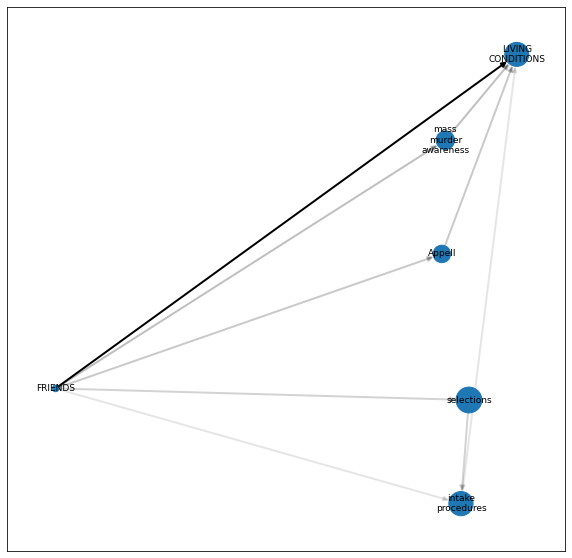

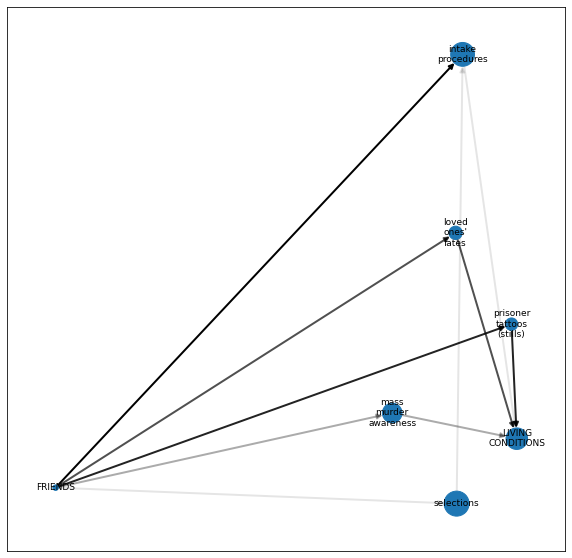

In [252]:

story_start = ['friends']
story_end = ['living conditions']
flux = 0.2
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


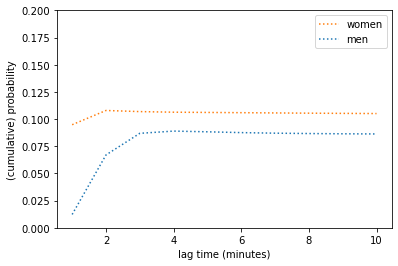

In [253]:

_msmlags = np.arange(1, 11)

topic_1 = topic_map_living_conditions
topic_2= ['friends']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 14 B

### Qualitative description

In narratives of those men and women who did not work, aid giving and living conditions are much more connected for women:

living conditions - aid giving

For women 7.4% of total traffic is going through this path, whereas for men, it is 3.36%.

### Quantitative evidence

In [254]:
flux = 0.3
story_start = 'living conditions'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



In [255]:
print_similar_paths(flux_w,flux_m)

living conditions-camp adaptation methods-aid giving
Women: 2.6971677552893496
Men: 4.897048801824714


living conditions-mass murder awareness-aid giving
Women: 3.8249401868772983
Men: 4.66731634604931


living conditions-food-aid giving
Women: 3.0814828063259205
Men: 2.755085971331806


living conditions-aid giving
Women: 7.4367368010571075
Men: 3.3614621776665805


living conditions-selections-aid giving
Women: 7.2285770368578595
Men: 3.7203860241219986




### Visualization

7 labels to show
10 labels to show


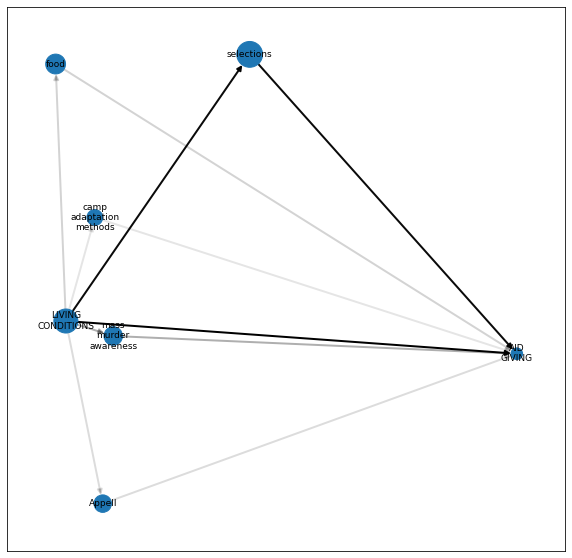

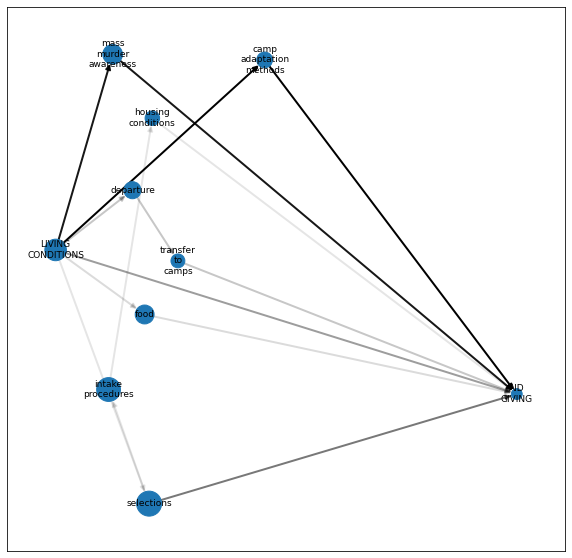

In [256]:
story_start = ['living conditions']
story_end = ['aid giving']
flux = 0.25
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

The probability that aid giving follows living condiions is higher for women.

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


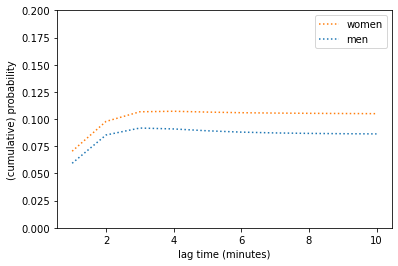

In [257]:




_msmlags = np.arange(1, 11)

topic_1 = topic_map_living_conditions
topic_2= ['aid giving']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 15

### Qualitative description

In narratives of those men and women who did not work, aid giving and survival explanations are much more connected for women:

aid giving-survival explanations


For women 1.8% of total traffic is going through this path, whereas for men, it is 0.7753%.

### Quantitative evidence

In [258]:
flux = 0.8
story_start = 'aid giving'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



In [259]:
print_similar_paths(flux_w,flux_m)

aid giving-children-survival explanations
Women: 0.5082401796012543
Men: 0.7362002196727213


aid giving-survival explanations
Women: 1.899768244054112
Men: 0.7753690554284675


aid giving-selections-survival explanations
Women: 4.902150158539
Men: 4.170339521614395




### Visualize it

8 labels to show
10 labels to show


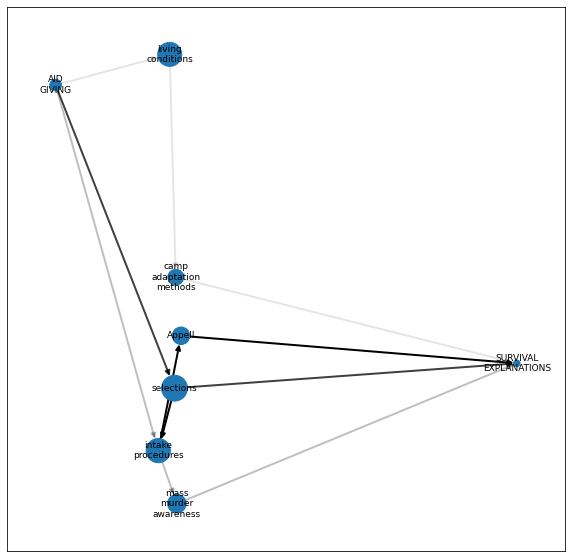

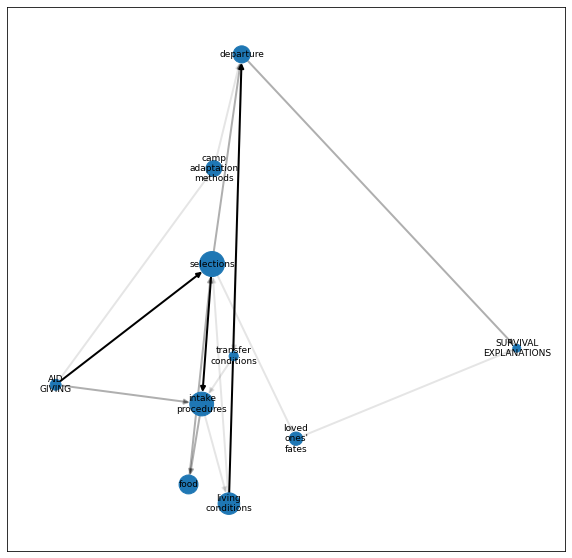

In [260]:
story_start = ['aid giving']
story_end = ['survival explanations']
flux = 0.15
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


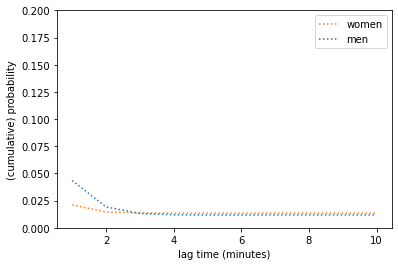

In [261]:




_msmlags = np.arange(1, 11)

topic_2 = ['survival explanations']
topic_1= ['aid giving']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 16

### Qualitative description

In narratives of those men and women who worked, aid giving and survival explanations are  more connected for men:

aid giving-survival explanations


For women 2.6% of total traffic is going through this path, whereas for men, it is 3.39%.

But in case of women, there are a number of short non-directs paths:

aid giving-social relations-survival explanations:1.5957266441234774

aid giving-diseases-survival explanations: 1.2137559365334227

aid giving-friends-survival explanations:0.8478423026431587

aid giving-food-survival explanations:2.105173850686586




### Quantitative evidence

In [262]:
flux = 1
story_start = 'aid giving'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [263]:
print_paths(flux_w,max_length=3)

aid giving-forced labor-survival explanations:10.274883518436638


aid giving-selections-survival explanations:6.262382909056714


aid giving-survival explanations:2.629599814325137


aid giving-food-survival explanations:2.105173850686587


aid giving-camp adaptation methods-survival explanations:1.9000349846387956


aid giving-social relations-survival explanations:1.59572664412347


aid giving-family interactions-survival explanations:1.3481277578061996


aid giving-brutal treatment-survival explanations:1.3050023962675068


aid giving-sanitary conditions-survival explanations:1.2298922862940636


aid giving-diseases-survival explanations:1.2137559365334227


aid giving-mass murder awareness-survival explanations:1.1929167068256792


aid giving-friends-survival explanations:0.8478423026431587


aid giving-preferential treatment-survival explanations:0.5818043488642713


aid giving-transfer from camps-survival explanations:0.24639667680024233




In [264]:
print_paths(flux_m,max_length=3)

aid giving-forced labor-survival explanations:5.301981681895433


aid giving-selections-survival explanations:4.708154304765716


aid giving-survival explanations:3.39773042609151


aid giving-intake procedures-survival explanations:2.1722231257740368


aid giving-hiding and evasion-survival explanations:1.3473658077421038


aid giving-deportation procedures-survival explanations:0.628834845560736


aid giving-emotions-survival explanations:0.21612315732369614


aid giving-resistance groups-survival explanations:0.1501670470890702




In [265]:
print_similar_paths(flux_w,flux_m)

aid giving-survival explanations
Women: 2.629599814325137
Men: 3.39773042609151


aid giving-forced labor-survival explanations
Women: 10.274883518436638
Men: 5.301981681895433


aid giving-selections-survival explanations
Women: 6.262382909056714
Men: 4.708154304765716




### Visualize

11 labels to show
18 labels to show


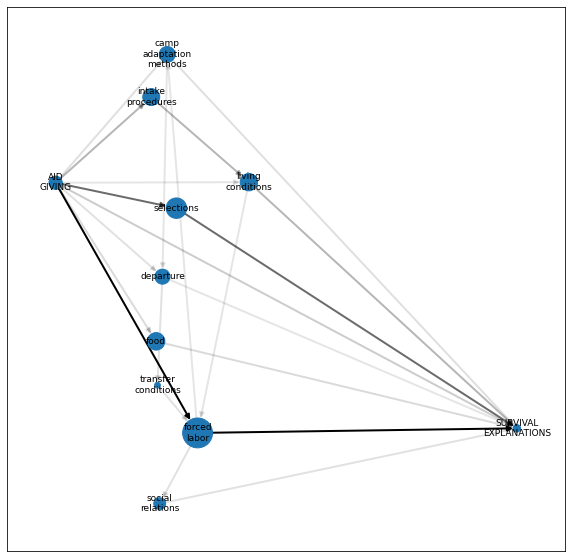

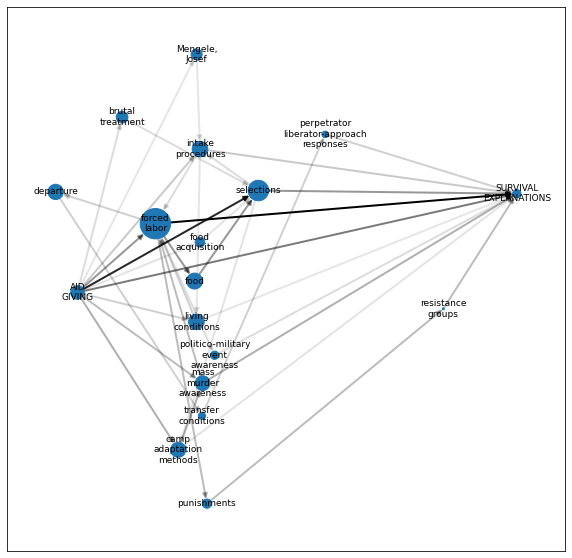

In [266]:

story_start = ['aid giving']
story_end = ['survival explanations']
flux = 0.3
res = visualize_most_important_paths(data_set_1_w_work,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_work,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

The probability that aid giving follows survival explanations is higher for men.

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


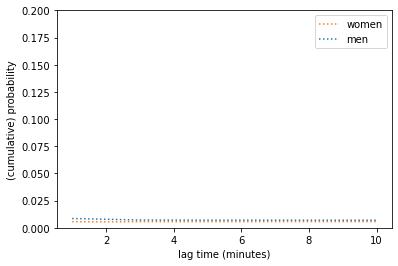

In [267]:




_msmlags = np.arange(1, 11)

topic_1 = ['survival explanations']
topic_2= ['aid giving']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 17

### Qualitative descriptions

In narratives of those men and women who worked, social relations and survival explanations are  more connected for women:

social relations-survival explanations


For women 4.7% of total traffic is going through the path above;  for men 2.5% is going through this path.

A key path with transitory topic for men includes:

social relations-aid giving-survival explanations
2.50368892717799

Key paths with transitory topics for women includes:

social relations-living conditions-survival explanations:2.9110184744683765

social relations-preferential treatment-survival explanations:0.8644349360585929


social relations-friends-survival explanations:0.7264439886153188


### Quantitative evidence

In [268]:
flux = 1
story_start = 'social relations'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [269]:
print_paths(flux_w,max_length=3)

social relations-forced labor-survival explanations:6.580571008586384


social relations-selections-survival explanations:6.20491584541495


social relations-survival explanations:4.770496146893107


social relations-living conditions-survival explanations:2.911018474468376


social relations-family interactions-survival explanations:1.3385004112989114


social relations-mass murder awareness-survival explanations:1.18269916884545


social relations-preferential treatment-survival explanations:0.864434936058593


social relations-friends-survival explanations:0.726443988615319


social relations-bombardments-survival explanations:0.6957857767932121


social relations-prisoner medical personnel-survival explanations:0.010500443274819204


social relations-language skills-survival explanations:3.867674952049249e-06




In [270]:
print_paths(flux_m,max_length=3)

social relations-forced labor-survival explanations:5.3596310909125116


social relations-selections-survival explanations:2.7868697854554743


social relations-mass murder awareness-survival explanations:2.630130360597818


social relations-aid giving-survival explanations:2.503688927177986


social relations-survival explanations:0.2060149321749403




In [271]:
print_similar_paths(flux_w,flux_m)

social relations-survival explanations
Women: 4.770496146893107
Men: 0.2060149321749403


social relations-forced labor-survival explanations
Women: 6.580571008586384
Men: 5.3596310909125116


social relations-selections-survival explanations
Women: 6.20491584541495
Men: 2.7868697854554743


social relations-mass murder awareness-survival explanations
Women: 1.18269916884545
Men: 2.630130360597818




### Visualize

5 labels to show
10 labels to show


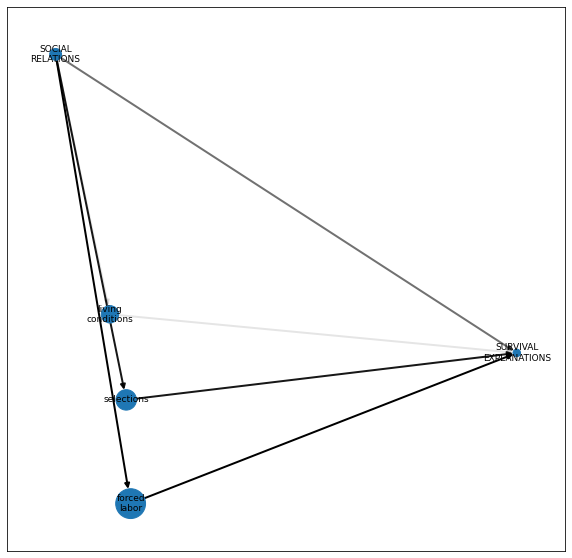

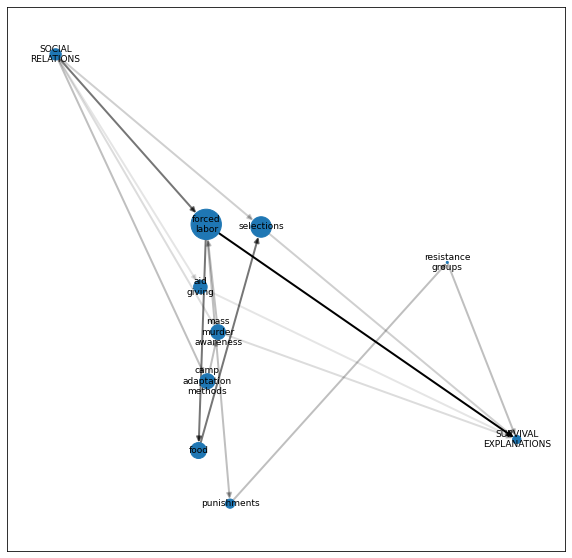

In [272]:

story_start = ['social relations']
story_end = ['survival explanations']
flux = 0.18
res = visualize_most_important_paths(data_set_1_w_work,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_work,flux,features_df,story_start,story_end,None)

## Observation 18

### Qualitative description

In narratives of those men and women who worked, social relations and forced labor are more connected for men:

social relations-forced labor
Women: 7.786906600083256
Men: 11.051234286602039

forced labor-social relations
Women: 10.931980703238628
Men: 11.027089792748091



### Quantitative evidence

In [273]:
flux = 1
story_start = 'social relations'
story_end = 'forced labor'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



In [274]:
print_similar_paths(flux_w,flux_m,max_length=2)

social relations-forced labor
Women: 7.786906600083253
Men: 11.051234286602044




In [275]:
flux = 1
story_start = 'forced labor'
story_end = 'social relations'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [276]:
print_similar_paths(flux_w,flux_m,max_length=2)

forced labor-social relations
Women: 10.931980703238624
Men: 11.027089792748093




### Visualize 

6 labels to show
5 labels to show


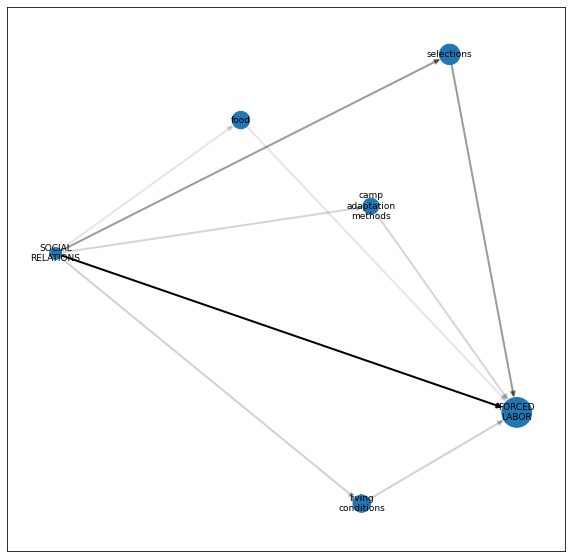

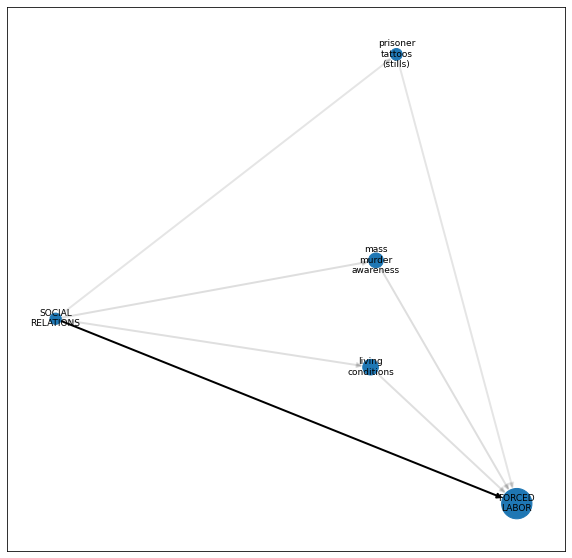

In [277]:

story_start = ['social relations']
story_end = ['forced labor']
flux = 0.18
res = visualize_most_important_paths(data_set_1_w_work,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_work,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


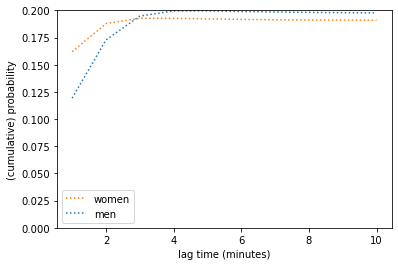

In [278]:




_msmlags = np.arange(1, 11)

topic_1 = topic_map_forced_labor
topic_2= ['social relations','friends']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 18 B

### Qualitative description

In narratives of those men and women who worked, friends and living conditions are  more connected  for women than for men:

social relations-living conditions


living conditions-friends
Women: 3.499585921266175
Men: 1.665785919545009

### Quantitative evidence

In [279]:
flux = 0.4
story_start = 'living conditions'
story_end = 'friends'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [280]:
print_similar_paths(flux_w,flux_m,max_length=3)

living conditions-selections-friends
Women: 2.5209620387857066
Men: 3.1198169818492043


living conditions-forced labor-friends
Women: 9.047722735552378
Men: 8.204800477134933


living conditions-friends
Women: 3.4995859212661715
Men: 1.6657859195450075


living conditions-food-friends
Women: 4.082717581661703
Men: 1.5102027554622697




### Visualize

23 labels to show
28 labels to show


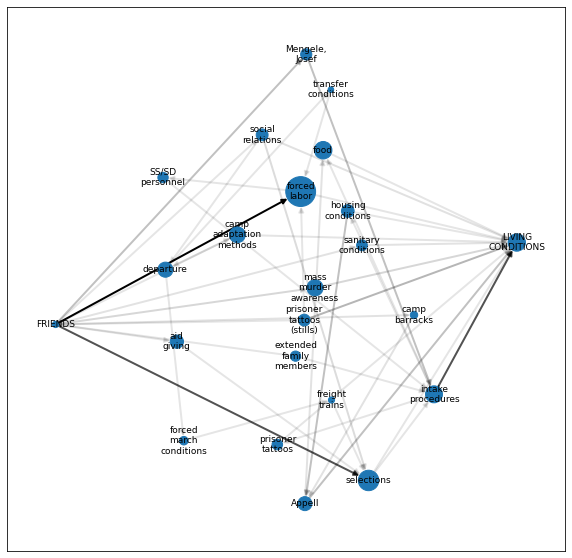

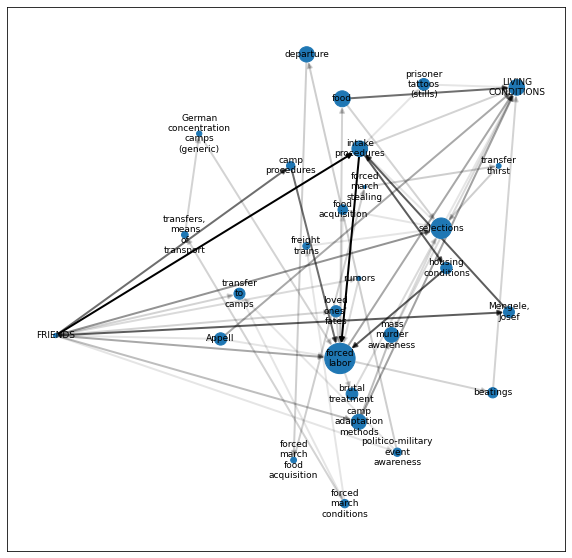

In [281]:

story_start = ['friends']
story_end = ['living conditions']
flux = 0.4
res = visualize_most_important_paths(data_set_1_w_work,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_work,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


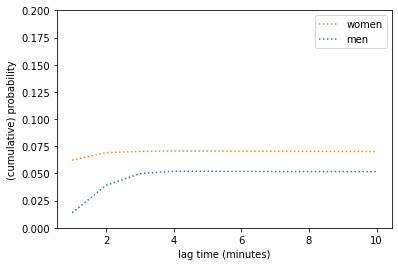

In [282]:




_msmlags = np.arange(1, 11)

topic_1 = topic_map_living_conditions
topic_2= ['friends']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 19

### Qualitative description

Forced labor and aid giving are strongly and more or less equally connected for those women and men who worked. Generally, we see a strong connection between forced labor and aid giving.

### Quantitative evidence

In [283]:
flux = 1
story_start = 'forced labor'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [284]:
print_similar_paths(flux_w,flux_m,max_length=2)

forced labor-aid giving
Women: 15.965854319863244
Men: 16.984021815412085




In [285]:
flux = 1
story_start = 'aid giving'
story_end = 'forced labor'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [286]:
print_similar_paths(flux_w,flux_m,max_length=2)

aid giving-forced labor
Women: 12.73960629371799
Men: 11.50346818068365




## Observation 20

### Qualitative description

Living conditions and food sharing are more connected for those women who worked than those men who worked. For instance, for women 6.6% is going through the following paths:

living conditions-food-food sharing

and 3.5% through the following one:

living conditions-food sharing

In testimonies of men, direct path was not found, instead the traffic is going through the following two paths:

living conditions-social relations-food sharing
2 %

living conditions-aid giving-food sharing
1.3 %


### Quantitative evidence

In [287]:
flux = 1
story_start = 'living conditions'
story_end = 'food sharing'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [288]:
print_paths(flux_w,max_length=3)

living conditions-forced labor-food sharing:13.33343293337338


living conditions-food-food sharing:6.694203253395237


living conditions-selections-food sharing:3.625128014284016


living conditions-food sharing:3.531295335718936


living conditions-camp adaptation methods-food sharing:2.54069168108314


living conditions-Appell-food sharing:2.1199443423068223


living conditions-mass murder awareness-food sharing:1.7299635517089869


living conditions-social relations-food sharing:1.675554976037298


living conditions-brutal treatment-food sharing:1.211214279769367


living conditions-extended family members-food sharing:1.0379543162096334


living conditions-stealing-food sharing:0.9728015212314262


living conditions-camp procedures-food sharing:0.8042263266058215


living conditions-survival explanations-food sharing:0.7868149102356049


living conditions-camp childbearing-food sharing:0.7245532844805613


living conditions-cultural activities-food sharing:0.5246266336695468


liv

In [289]:
print_paths(flux_m,max_length=3)

living conditions-forced labor-food sharing:17.726226721172544


living conditions-camp adaptation methods-food sharing:2.5599288146118067


living conditions-social relations-food sharing:2.051116314998832


living conditions-crematoria-food sharing:1.7321754283422932


living conditions-kapos-food sharing:1.467058860744995


living conditions-aid giving-food sharing:1.370575644810666


living conditions-prisoner external contact-food sharing:1.2117405106745833


living conditions-children-food sharing:0.642877210560859


living conditions-loved ones' renewed contacts-food sharing:0.4357539199226838


living conditions-departure-food sharing:0.2820238572843281


living conditions-diseases-food sharing:0.0013947090499069699




In [290]:
print_similar_paths(flux_w,flux_m,max_length=4)

living conditions-forced labor-food sharing
Women: 13.33343293337338
Men: 17.726226721172544


living conditions-social relations-food sharing
Women: 1.675554976037298
Men: 2.051116314998832


living conditions-camp adaptation methods-food sharing
Women: 2.54069168108314
Men: 2.5599288146118067




### Quantitative evidence 3

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


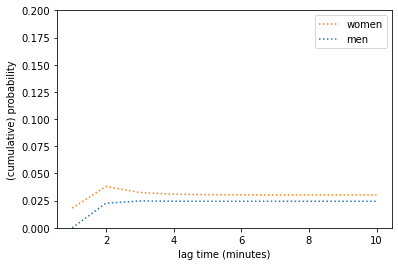

In [291]:




_msmlags = np.arange(1, 11)

topic_1 = ['living conditions']
topic_2= ['food sharing']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 21

### Qualitative description

Forced labor and food sharing are more connected for men who worked than those women who worked. For instance, for women 13.3% is going through the following paths:

forced labor-food sharing

for men it is 22%

In case of aid giving the difference is slighter:

forced labor-aid giving

for women it is 15.965854319863244

and for men it 16.98


### Quantitative evidence

In [292]:
flux = 0.3
story_start = 'forced labor'
story_end = 'food sharing'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [293]:
print_similar_paths(flux_w,flux_m,max_length=2)

forced labor-food sharing
Women: 13.933977446499657
Men: 22.409844706135193




In [294]:
flux = 0.3
story_start = 'forced labor'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


In [295]:
print_similar_paths(flux_w,flux_m,max_length=2)

forced labor-aid giving
Women: 15.965854319863244
Men: 16.984021815412085




### Quantitative evidence 3

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


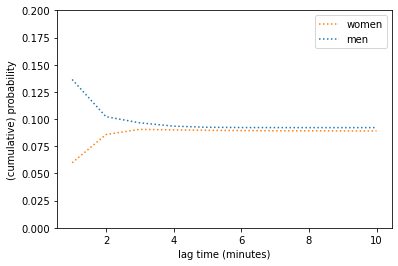

In [296]:




_msmlags = np.arange(1, 11)

topic_1 = ['forced labor']
topic_2= ['food sharing']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


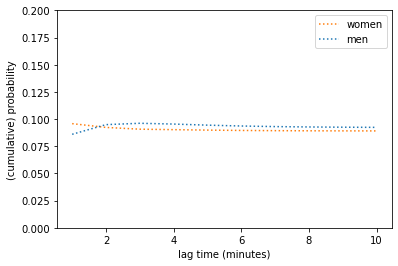

In [297]:




_msmlags = np.arange(1, 11)

topic_1 = ['forced labor']
topic_2= ['aid giving']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 22

### Qualitative description

Those men who did not work are more likely to connect stealing and camp living conditions.

### Quantitative evidence

In [298]:
flux = 0.2
story_start = 'living conditions'
story_end = 'stealing'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

print_similar_paths(flux_w,flux_m)

In [299]:
flux = 0.2
story_start = 'stealing'
story_end = 'living conditions'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [300]:
print_similar_paths(flux_w,flux_m)

stealing-living conditions
Women: 6.5709888191263675
Men: 8.813948358670142


stealing-selections-intake procedures-living conditions
Women: 10.116749298333374
Men: 4.305969585396938




### Quantitative evidence 3

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


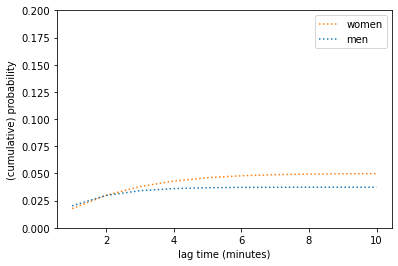

In [301]:




_msmlags = np.arange(1, 11)

topic_1 = ['living conditions']
topic_2= ['stealing']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 23

### Qualitative description

In narratives of women, preferential treatment is more likely to lead to survival explanation.

### Quantitative evidence

In [302]:
flux = 1
story_start = 'preferential treatment'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [303]:
print_paths(flux_w,max_length=2)

preferential treatment-survival explanations:2.236054659628997




In [304]:
print_paths(flux_m,max_length=2)

preferential treatment-survival explanations:0.7167492514937756




### Quantitative evidence 3

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


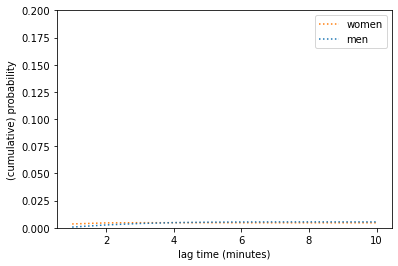

In [305]:




_msmlags = np.arange(1, 11)

topic_1 = ['preferential treatment']
topic_2= ['survival explanations']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 24 A

### Qualitative description

In narratives of women, preferential treatment is more likely to be preceded by living conditions:

living conditions-preferential treatment
Women: 3.267726057364454
Men: 1.9161261348630667



### Quantitative evidence

In [306]:
flux = 1
story_start = 'living conditions'
story_end = 'preferential treatment'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [307]:
print_similar_paths(flux_w,flux_m)

living conditions-social relations-preferential treatment
Women: 1.6221685959186976
Men: 1.4929906305386693


living conditions-Slovak prisoners-preferential treatment
Women: 0.162106945743557
Men: 0.06367726723231093


living conditions-prisoner doctors-preferential treatment
Women: 0.11849262952862828
Men: 0.1784296149159391


living conditions-punishments-preferential treatment
Women: 0.5617658524282059
Men: 0.5848714819659


living conditions-extended family members-preferential treatment
Women: 1.2057398318890522
Men: 0.7904858658795098


living conditions-camp adaptation methods-preferential treatment
Women: 3.0327680599828137
Men: 4.44698584875514


living conditions-forced labor-preferential treatment
Women: 6.698457633052369
Men: 6.5255282569842725


living conditions-selections-preferential treatment
Women: 5.188123793345709
Men: 3.7223073430808165


living conditions-brutal treatment-preferential treatment
Women: 1.4946210957982586
Men: 0.8339599708944239


living conditions

### Quantitative evidence 3

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


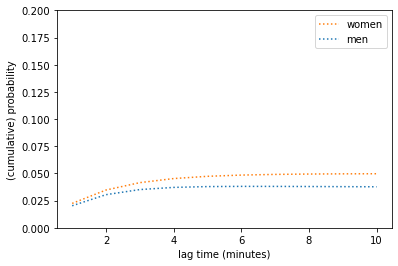

In [308]:




_msmlags = np.arange(1, 11)

topic_1 = ['living conditions']
topic_2= ['preferential treatment']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 24

### Qualitative description

In narratives of women, Blockalteste is more connected to survival explanations;

Blockälteste-survival explanations
Women: 1.5644480047580056
Men: 0.8118622824526782

### Quantitative evidence

In [309]:
flux = 1
story_start = 'Blockälteste'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [310]:
print_paths(flux_w,max_length=3)

Blockälteste-living conditions-survival explanations:4.132201110367787


Blockälteste-forced labor-survival explanations:3.5676097525837367


Blockälteste-mass murder awareness-survival explanations:3.177753376108323


Blockälteste-camp adaptation methods-survival explanations:2.8775149967576965


Blockälteste-survival explanations:1.564448004758016


Blockälteste-deaths-survival explanations:0.8794835858961015


Blockälteste-Jewish prisoners-survival explanations:0.8764638940999907


Blockälteste-loved ones' renewed contacts-survival explanations:0.7938565243042017


Blockälteste-preferential treatment-survival explanations:0.7689943936009314


Blockälteste-beatings-survival explanations:0.5602060065650608


Blockälteste-Czech prisoners-survival explanations:0.3436425329493435


Blockälteste-prisoner doctors-survival explanations:0.321635126262094


Blockälteste-female prisoner functionaries-survival explanations:0.26819563728905643


Blockälteste-attitudes toward prisoner functionari

In [311]:
print_paths(flux_m,max_length=3)

Blockälteste-survival explanations:0.8118622824526791


Blockälteste-loved ones' separations-survival explanations:0.023865026572721576




In [312]:
print_similar_paths(flux_w,flux_m)

Blockälteste-survival explanations
Women: 1.564448004758016
Men: 0.8118622824526791




### Quantitative evidence 3

0
1


/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
/miniconda3/envs/au_test/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.


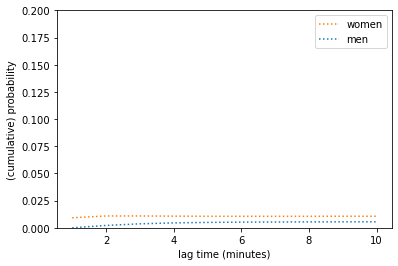

In [313]:




_msmlags = np.arange(1, 11)

topic_2 = ['survival explanations']
topic_1= ['Blockälteste']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)